In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **Imports**

In [3]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')



# **Dataset upload**

In [4]:
df=pd.read_excel('/content/drive/MyDrive/Data-Mining-Project-(Loan-eligibility)/loan_eligibility.xlsx')
print(df.shape) #shows num of row and column
df.head(5)

(100000, 19)


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0


**Display basic information about the data**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  int64  
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null 

In [ ]:
df.describe(include='all')

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,100000,100000,100000,1.000000e+05,100000,80846.000000,8.084600e+04,95778,100000,100000,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
unique,81999,81999,2,NaN,2,NaN,NaN,11,4,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,NaN,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,2,77361,NaN,72208,NaN,NaN,31121,48410,78552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.176045e+07,NaN,1076.456089,1.378277e+06,NaN,NaN,NaN,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,NaN,NaN,NaN,3.178394e+07,NaN,1475.403791,1.081360e+06,NaN,NaN,NaN,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,NaN,NaN,NaN,1.080200e+04,NaN,585.000000,7.662700e+04,NaN,NaN,NaN,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,NaN,NaN,NaN,1.796520e+05,NaN,705.000000,8.488440e+05,NaN,NaN,NaN,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,NaN,NaN,NaN,3.122460e+05,NaN,724.000000,1.174162e+06,NaN,NaN,NaN,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,NaN,NaN,NaN,5.249420e+05,NaN,741.000000,1.650663e+06,NaN,NaN,NaN,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000


In [5]:
# Checking unique values
df.nunique()

,0
Loan ID,81999
Customer ID,81999
Loan Status,2
Current Loan Amount,22004
Term,2
Credit Score,324
Annual Income,36174
Years in current job,11
Home Ownership,4
Purpose,16


In [ ]:
# Describe the data
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


**Data Cleanup**

In [6]:
# Renaming the Columns

df.rename(columns={'Loan ID':'loan_id','Customer ID':'customer_id','Loan Status':'loan_status','Current Loan Amount':'current_loan_amt',
                   'Term':'term','Credit Score':'credit_score','Annual Income':'annual_income','Years in current job':'yrs_current_job',
                   'Home Ownership':'home_ownership','Purpose':'purpose','Monthly Debt':'monthly_debt','Years of Credit History':'yrs_credit_history',
                   'Months since last delinquent':'months_last delinquent','Number of Open Accounts':'num_open_account',
                   'Number of Credit Problems':'num_credit_problem','Current Credit Balance':'current_credit_balance',
                   'Maximum Open Credit':'max_open_credit','Bankruptcies':'bankruptcies','Tax Liens':'tax_liens'},inplace=True)

In [7]:
# Identifying Categorical & Numerical Cols

cols = df.columns
num_col = df._get_numeric_data().columns.to_list()
cat_col = list(set(cols)-set(num_col))

print('Numerical Columns')
print(num_col)
print('\nCategorical Columns')
print(cat_col)

Numerical Columns
['current_loan_amt', 'credit_score', 'annual_income', 'monthly_debt', 'yrs_credit_history', 'months_last delinquent', 'num_open_account', 'num_credit_problem', 'current_credit_balance', 'max_open_credit', 'bankruptcies', 'tax_liens']

Categorical Columns
['home_ownership', 'customer_id', 'term', 'purpose', 'loan_id', 'yrs_current_job', 'loan_status']


In [8]:
# Checking for Duplicates
dfd = df[df.duplicated()]
dfd.shape

(10215, 19)

In [9]:
# Removing Duplicates
df.drop(dfd.index,inplace=True)
df.shape



(89785, 19)

In [10]:
# Dealing with Null values
df.isnull().sum()

,0
loan_id,0
customer_id,0
loan_status,0
current_loan_amt,0
term,0
credit_score,19154
annual_income,19154
yrs_current_job,3802
home_ownership,0
purpose,0


In [11]:
# months_last having more than 50% null values so drop that column
df.drop(['months_last delinquent'],axis=1,inplace=True)

# yrs_current_job is a categorical variable having null values so dropping nulls
dfj = df[df['yrs_current_job'].isnull()]
df.drop(dfj.index,inplace=True)

df.isnull().sum()

,0
loan_id,0
customer_id,0
loan_status,0
current_loan_amt,0
term,0
credit_score,18344
annual_income,18344
yrs_current_job,0
home_ownership,0
purpose,0


In [12]:
# Credit Score and Annual income are important features
# Dropping null records

dfc = df[df['credit_score'].isnull()]
df.drop(dfc.index,inplace=True)

dfa = df[df['annual_income'].isnull()]
df.drop(dfa.index,inplace=True)

# Deleting all rows having null values could lead to loss of information
# Replacing rest null records with Median in Numerical cols

for i in df._get_numeric_data().columns:
    df[i].fillna(df[i].median(),inplace=True)

df.isnull().sum()

,0
loan_id,0
customer_id,0
loan_status,0
current_loan_amt,0
term,0
credit_score,0
annual_income,0
yrs_current_job,0
home_ownership,0
purpose,0


**Correlation Matrix**

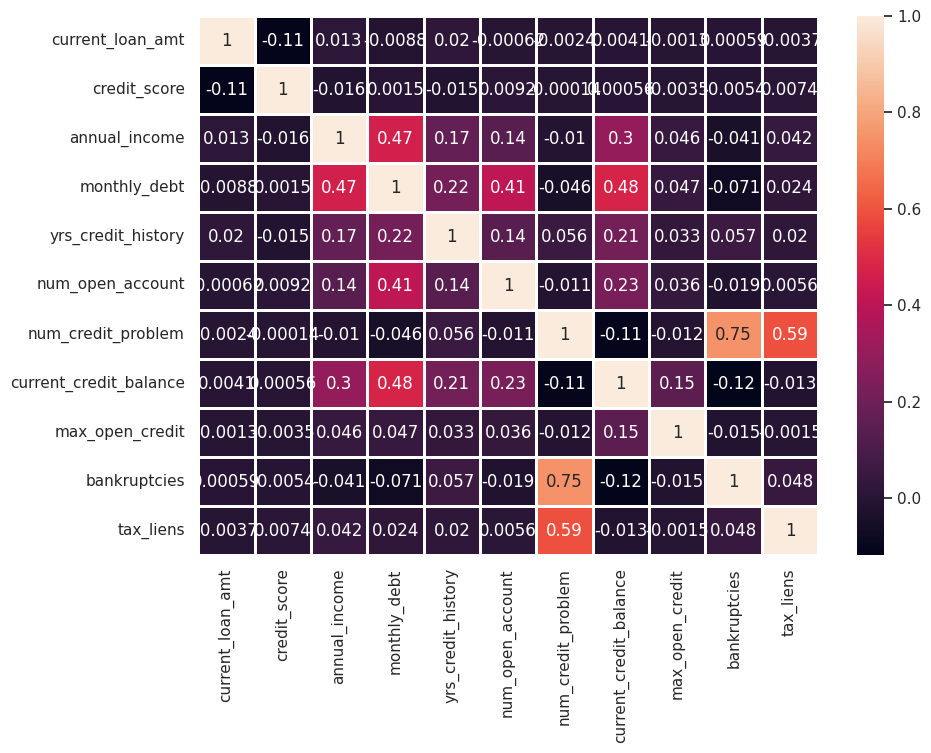

In [13]:
# Correlation Matrix

try:
    df['loan_id'] = pd.to_numeric(df['loan_id'])
except ValueError:
    # If 'loan_id' cannot be converted to numeric, exclude it from correlation calculation
    numeric_df = df.select_dtypes(include=np.number)

    plt.figure(figsize=(10,7))
    corr = numeric_df.corr() # Calculate correlation only on numeric columns
    sns.heatmap(corr,annot=True,linewidths = 1)
    plt.show()
else:
    plt.figure(figsize=(10,7))
    corr = df.corr()
    sns.heatmap(corr,annot=True,linewidths = 1)
    plt.show()

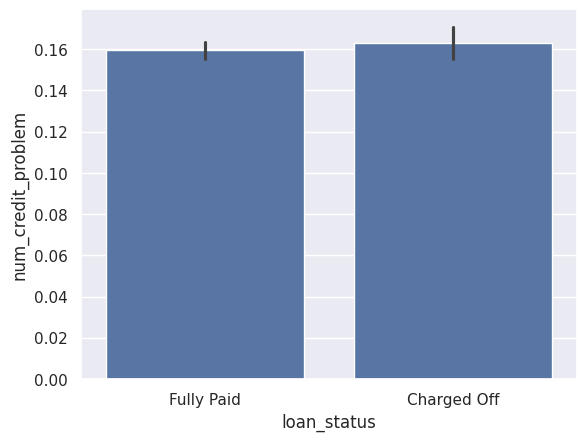

In [14]:
# Loan Status Vs Number of Credit Problems

sns.barplot(x=df['loan_status'],y=df['num_credit_problem'])
plt.show()

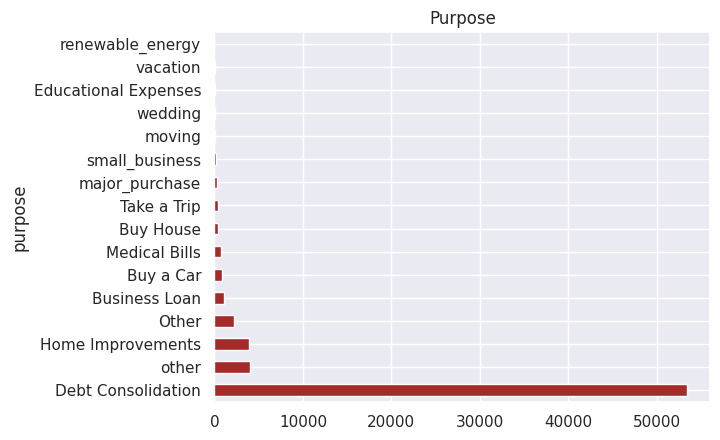

In [15]:
# Loan Purpose Distribution
# Maximum loan taken for Debt Consolidation

plt.title('Purpose')
df['purpose'].value_counts().plot(kind='barh',color='brown')
plt.show()

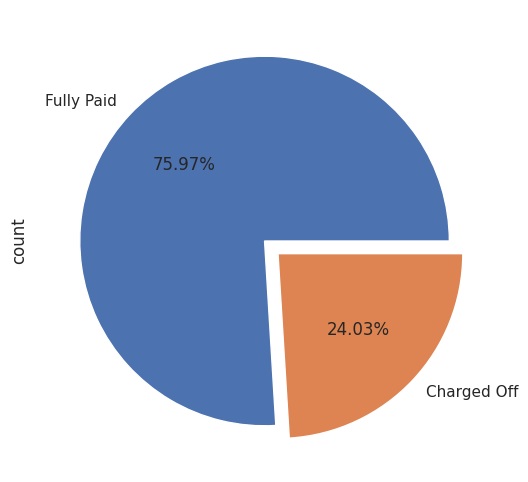

In [16]:
# Loan Status Distribution
# 75 % customers fully paid their debts to creditors

myexplode = [0, 0.1]
df['loan_status'].value_counts().plot.pie(figsize=(6,6),autopct='%.2f%%',explode=myexplode)
plt.show()

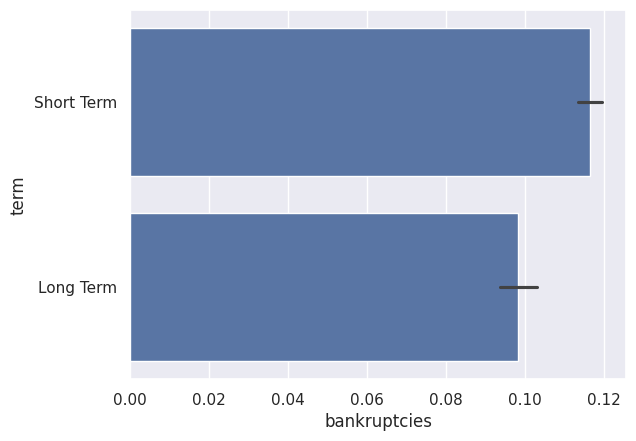

In [17]:
# Bankruptcies Vs Term
# For Short term loans customer cannot repay debts to creditors, hence have more chances of bankruptcy

sns.barplot(x=df['bankruptcies'],y=df['term'])
plt.show()

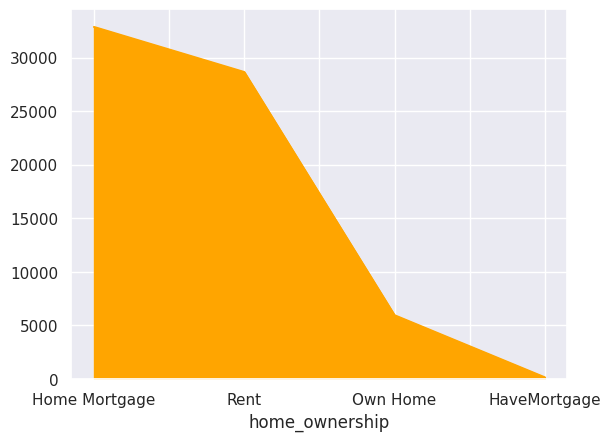

In [18]:
# Home Ownership Distribution
# Most of customers lives at residence which are home mortgaged

df['home_ownership'].value_counts().plot(kind='area',color='orange')
plt.show()

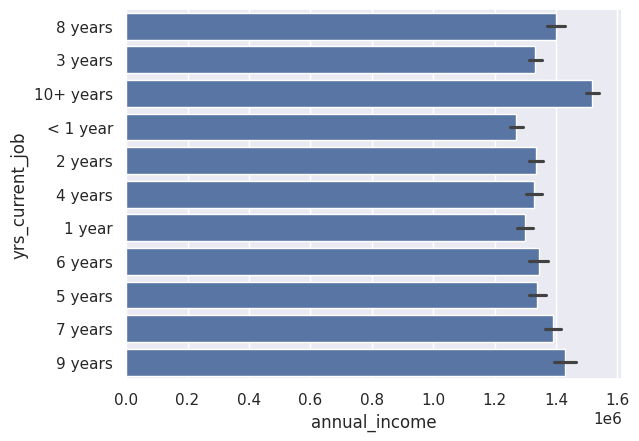

In [19]:
# Annual Income Vs Years in Current Job
# 10+ years expericed customers have maximum annual package
# Annual income of customer is directly proportional to number of years spent in current job

sns.barplot(x=df['annual_income'],y=df['yrs_current_job'])
plt.show()

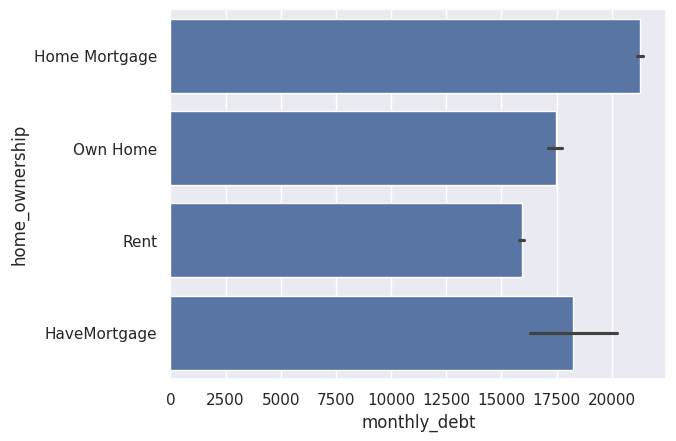

In [20]:
# Monthly Debt Vs Home Ownership
# Most of customers have high Monthly Debt for Home Mortgage

sns.barplot(x=df['monthly_debt'],y=df['home_ownership'])
plt.show()

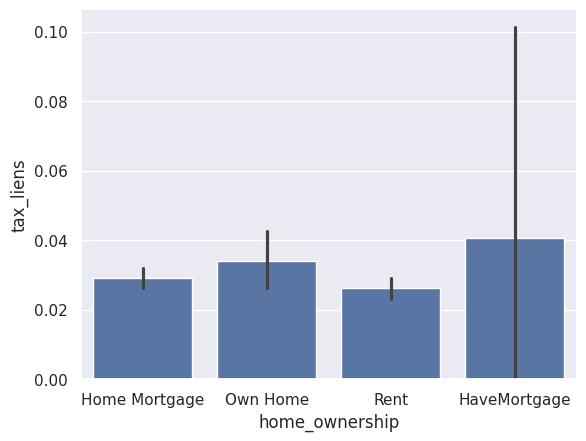

In [21]:
# Home Ownership Vs Tax Liens
# For Have Mortgage maximum tax liens were imposed

sns.barplot(y=df['tax_liens'],x=df['home_ownership'],orient='v')
plt.show()

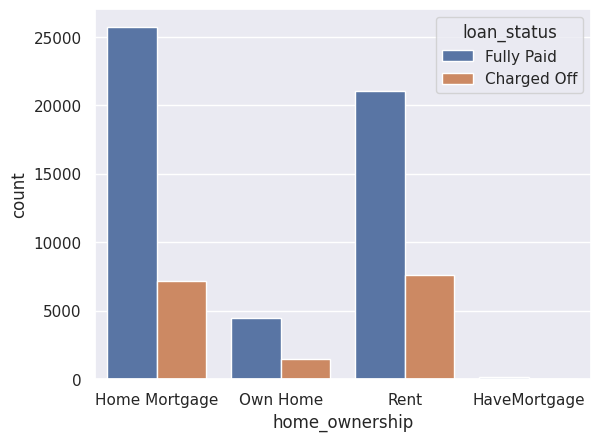

In [22]:
# Home Ownership Vs Loan Status
# Most of customers living at rent charged off

sns.countplot(x=df['home_ownership'],data=df,hue=df['loan_status']) # Change the first argument to x
plt.show()

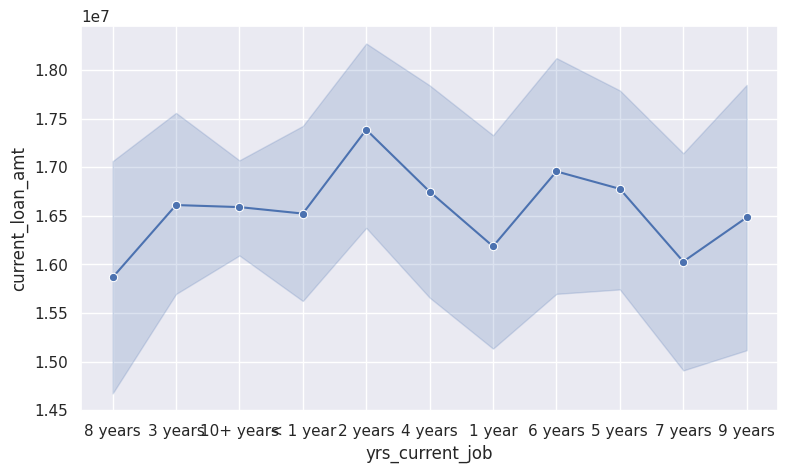

In [23]:
# Current Loan Amount Vs Years in Current Job
# 2 years expericed customers have higest current loan amount due

plt.figure(figsize=(9,5))
sns.lineplot(x=df['yrs_current_job'],y=df['current_loan_amt'],marker='o')
plt.show()

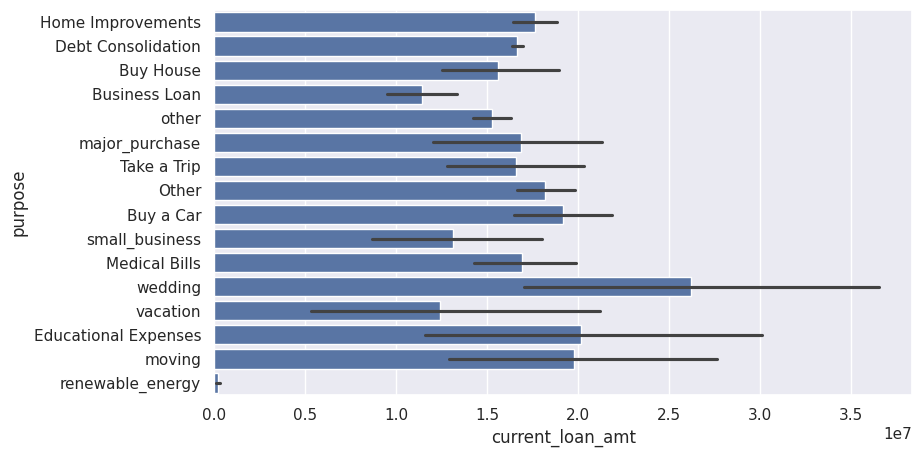

In [24]:
# Current Loan Amount Vs Purpose
# Results showed High Loan amount were granted for purpose like wedding, educational expenses, moving, buying a car etc

plt.figure(figsize=(9,5))
sns.barplot(x=df['current_loan_amt'],y=df['purpose'],orient='h')
plt.show()

# **Feature engineering**

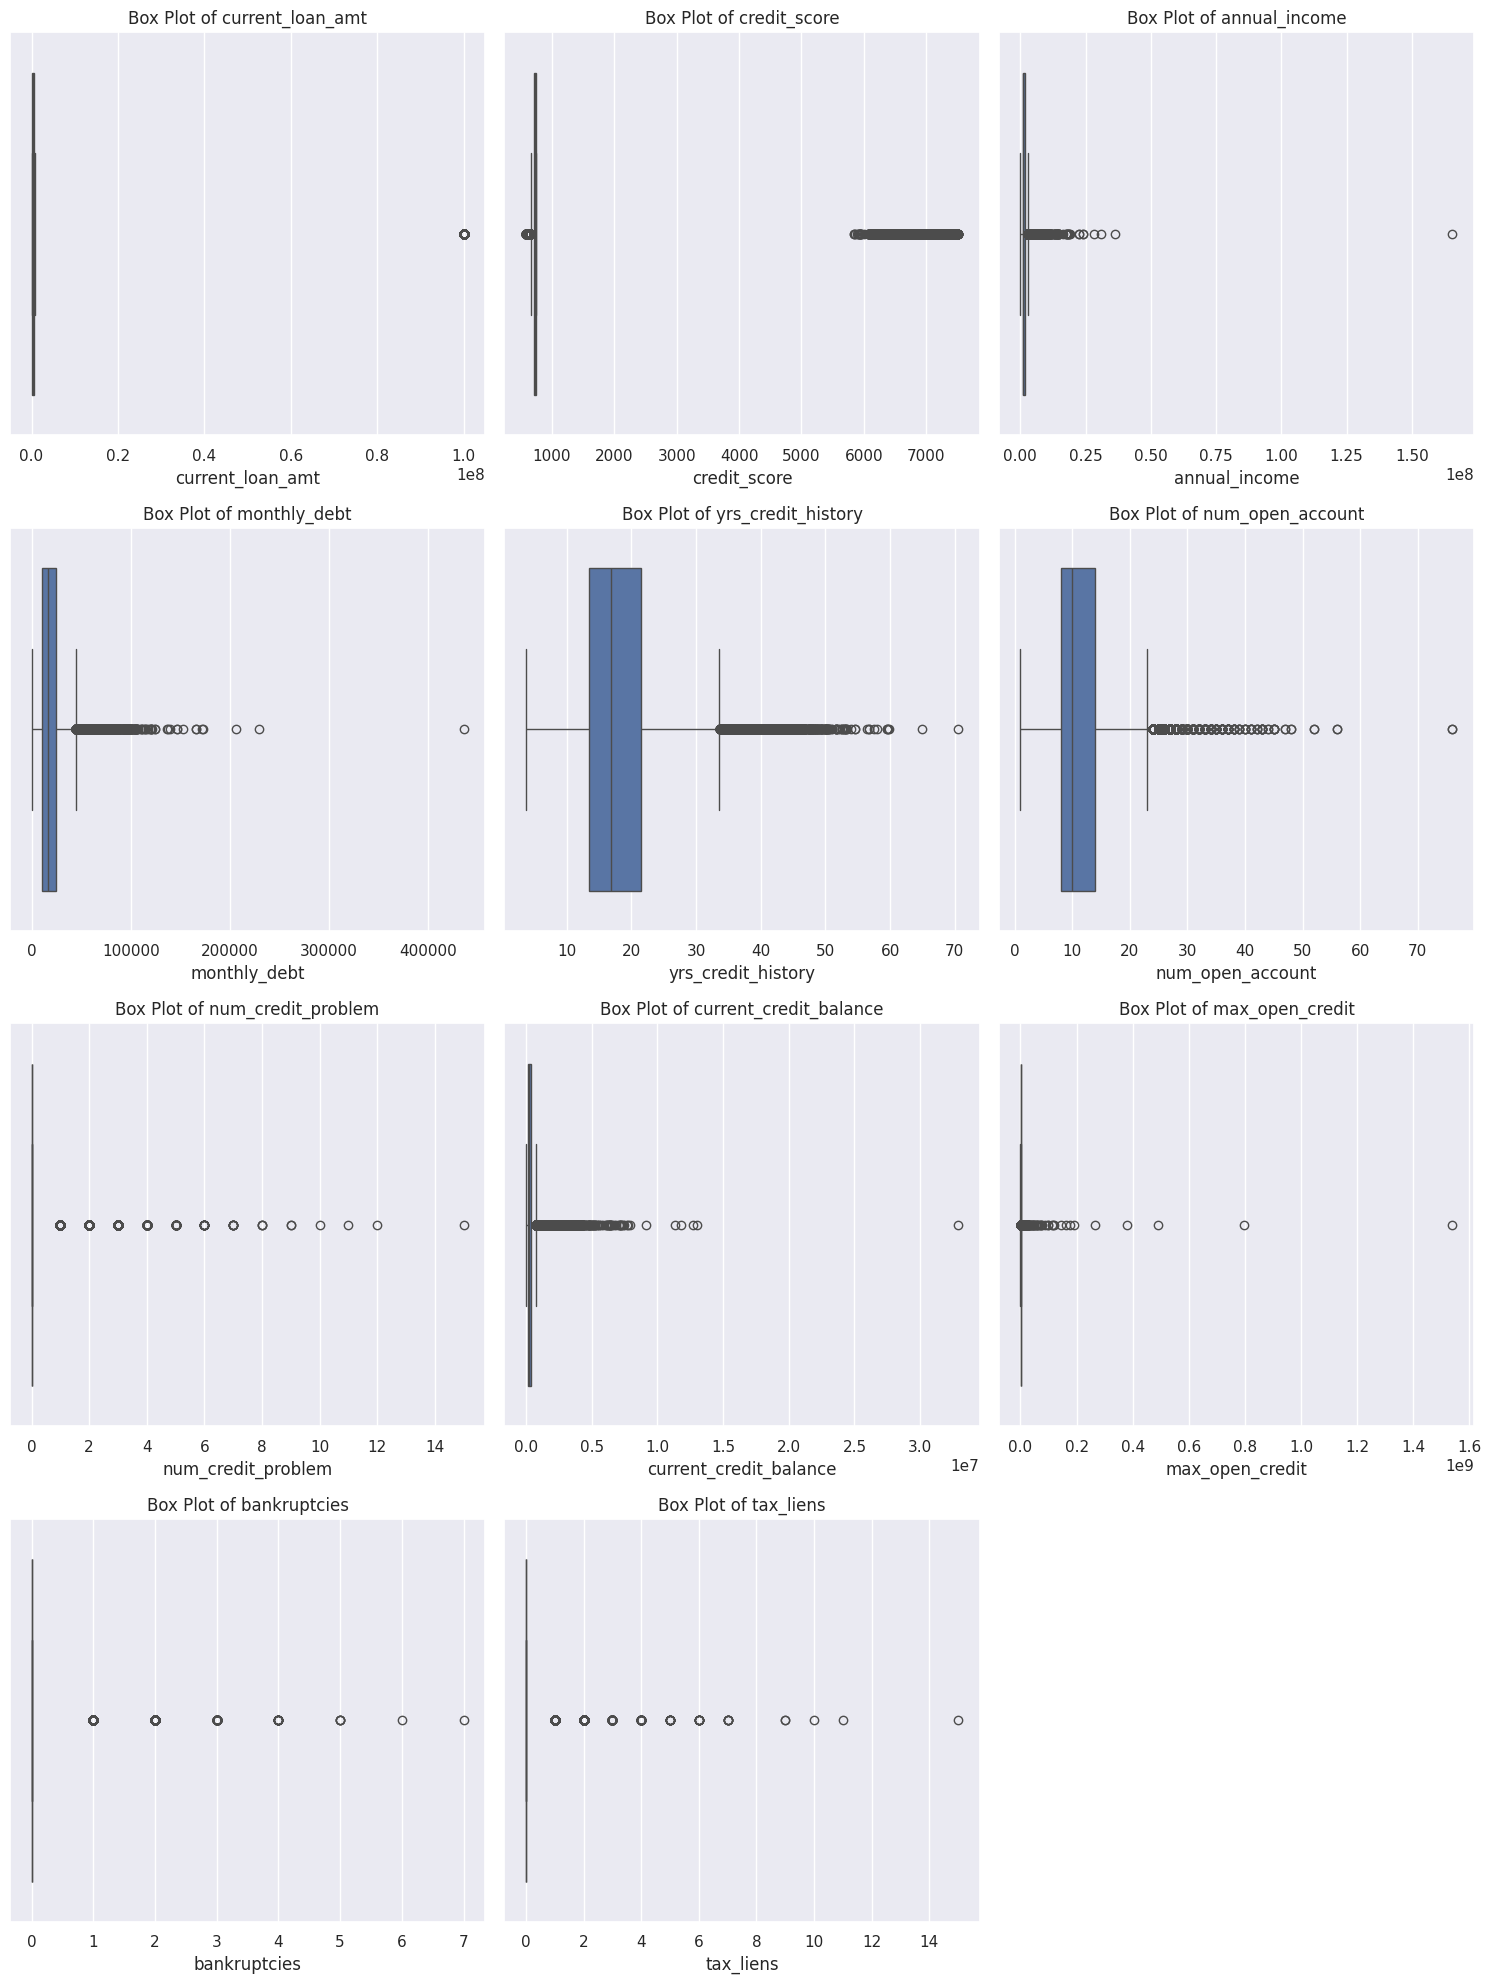

In [25]:
# Function to detect and visualize outliers using box plots
def detect_outliers(data, columns, num_cols=3):
    num_rows = (len(columns) + num_cols - 1) // num_cols # Calculate rows needed
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows)) # Adjust figsize as needed
    axes = axes.flatten() # Flatten the array for easier indexing

    for i, column in enumerate(columns):
        sns.boxplot(x=data[column], ax=axes[i])
        axes[i].set_title(f'Box Plot of {column}')

    # Hide empty subplots if any
    for i in range(len(columns), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout() # Adjust spacing for better layout
    plt.show()

# Get numerical columns
numerical_cols = df._get_numeric_data().columns.to_list()

# Detect and visualize outliers in a 3-column grid
detect_outliers(df, numerical_cols)

In [26]:
# Handling the Potential Outliers
# Since credit_score is a 3-digit number that represents the creditworthiness of an individual.
# It typically ranges between 300 and 900 and always have integer format, hence removing the outliers
# Deleting records where credit_score is greater than 900

dfc = df[df['credit_score']>900]
df.drop(dfc.index,inplace=True)
df.shape

(63334, 18)

In [27]:
# Since we can't have 0 Open Accounts
# So will drop those records

dfa = df[df['num_open_account']==0]
df.drop(dfa.index,inplace=True)
df.shape

(63334, 18)

In [28]:
# Dropping Customer_id & Loan_id columns

df.drop(['loan_id','customer_id'],axis=1,inplace=True)
df.shape

(63334, 16)

In [29]:
# values are very large in columns- Current_loan_amt, Monthly debt, Annual_income, Current_credit_balance & Max_open_credit
# It's better to take log values or use Winsorization as it brings data to a smaller range & do feature scaling on top of data

df['current_loan_amt'] = (df['current_loan_amt']+1).transform(np.log)
df['monthly_debt'] = (df['monthly_debt']+1).transform(np.log)
df['annual_income'] = (df['annual_income']+1).transform(np.log)
df['current_credit_balance'] = (df['current_credit_balance']+1).transform(np.log)
df['max_open_credit'] = (df['max_open_credit']+1).transform(np.log)
df['credit_score'] = (df['credit_score']+1).transform(np.log)

In [30]:
# Describing the data after trimming/capping the outliers

df.describe()

,current_loan_amt,credit_score,annual_income,monthly_debt,yrs_credit_history,num_open_account,num_credit_problem,current_credit_balance,max_open_credit,bankruptcies,tax_liens
count,63334.000000,63334.000000,63334.000000,63334.000000,63334.000000,63334.000000,63334.000000,63334.000000,63334.000000,63334.00000,63334.000000
mean,13.495695,6.578593,14.012377,9.602771,18.071737,11.179272,0.160151,12.102769,12.970778,0.11182,0.027758
std,2.348355,0.040016,0.513269,0.780073,6.812112,5.018426,0.473353,1.377645,1.374421,0.34330,0.256327
min,9.327501,6.373320,11.246718,0.000000,3.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,12.185107,6.562444,13.669726,9.247447,13.500000,8.000000,0.000000,11.642628,12.538433,0.00000,0.000000
50%,12.707850,6.588926,14.003471,9.701217,16.900000,10.000000,0.000000,12.264356,13.075928,0.00000,0.000000
75%,13.318299,6.608001,14.335875,10.091790,21.500000,14.000000,0.000000,12.822534,13.590169,0.00000,0.000000
max,18.420681,6.622736,17.412150,12.985040,70.500000,76.000000,15.000000,16.379456,21.154878,7.00000,15.000000


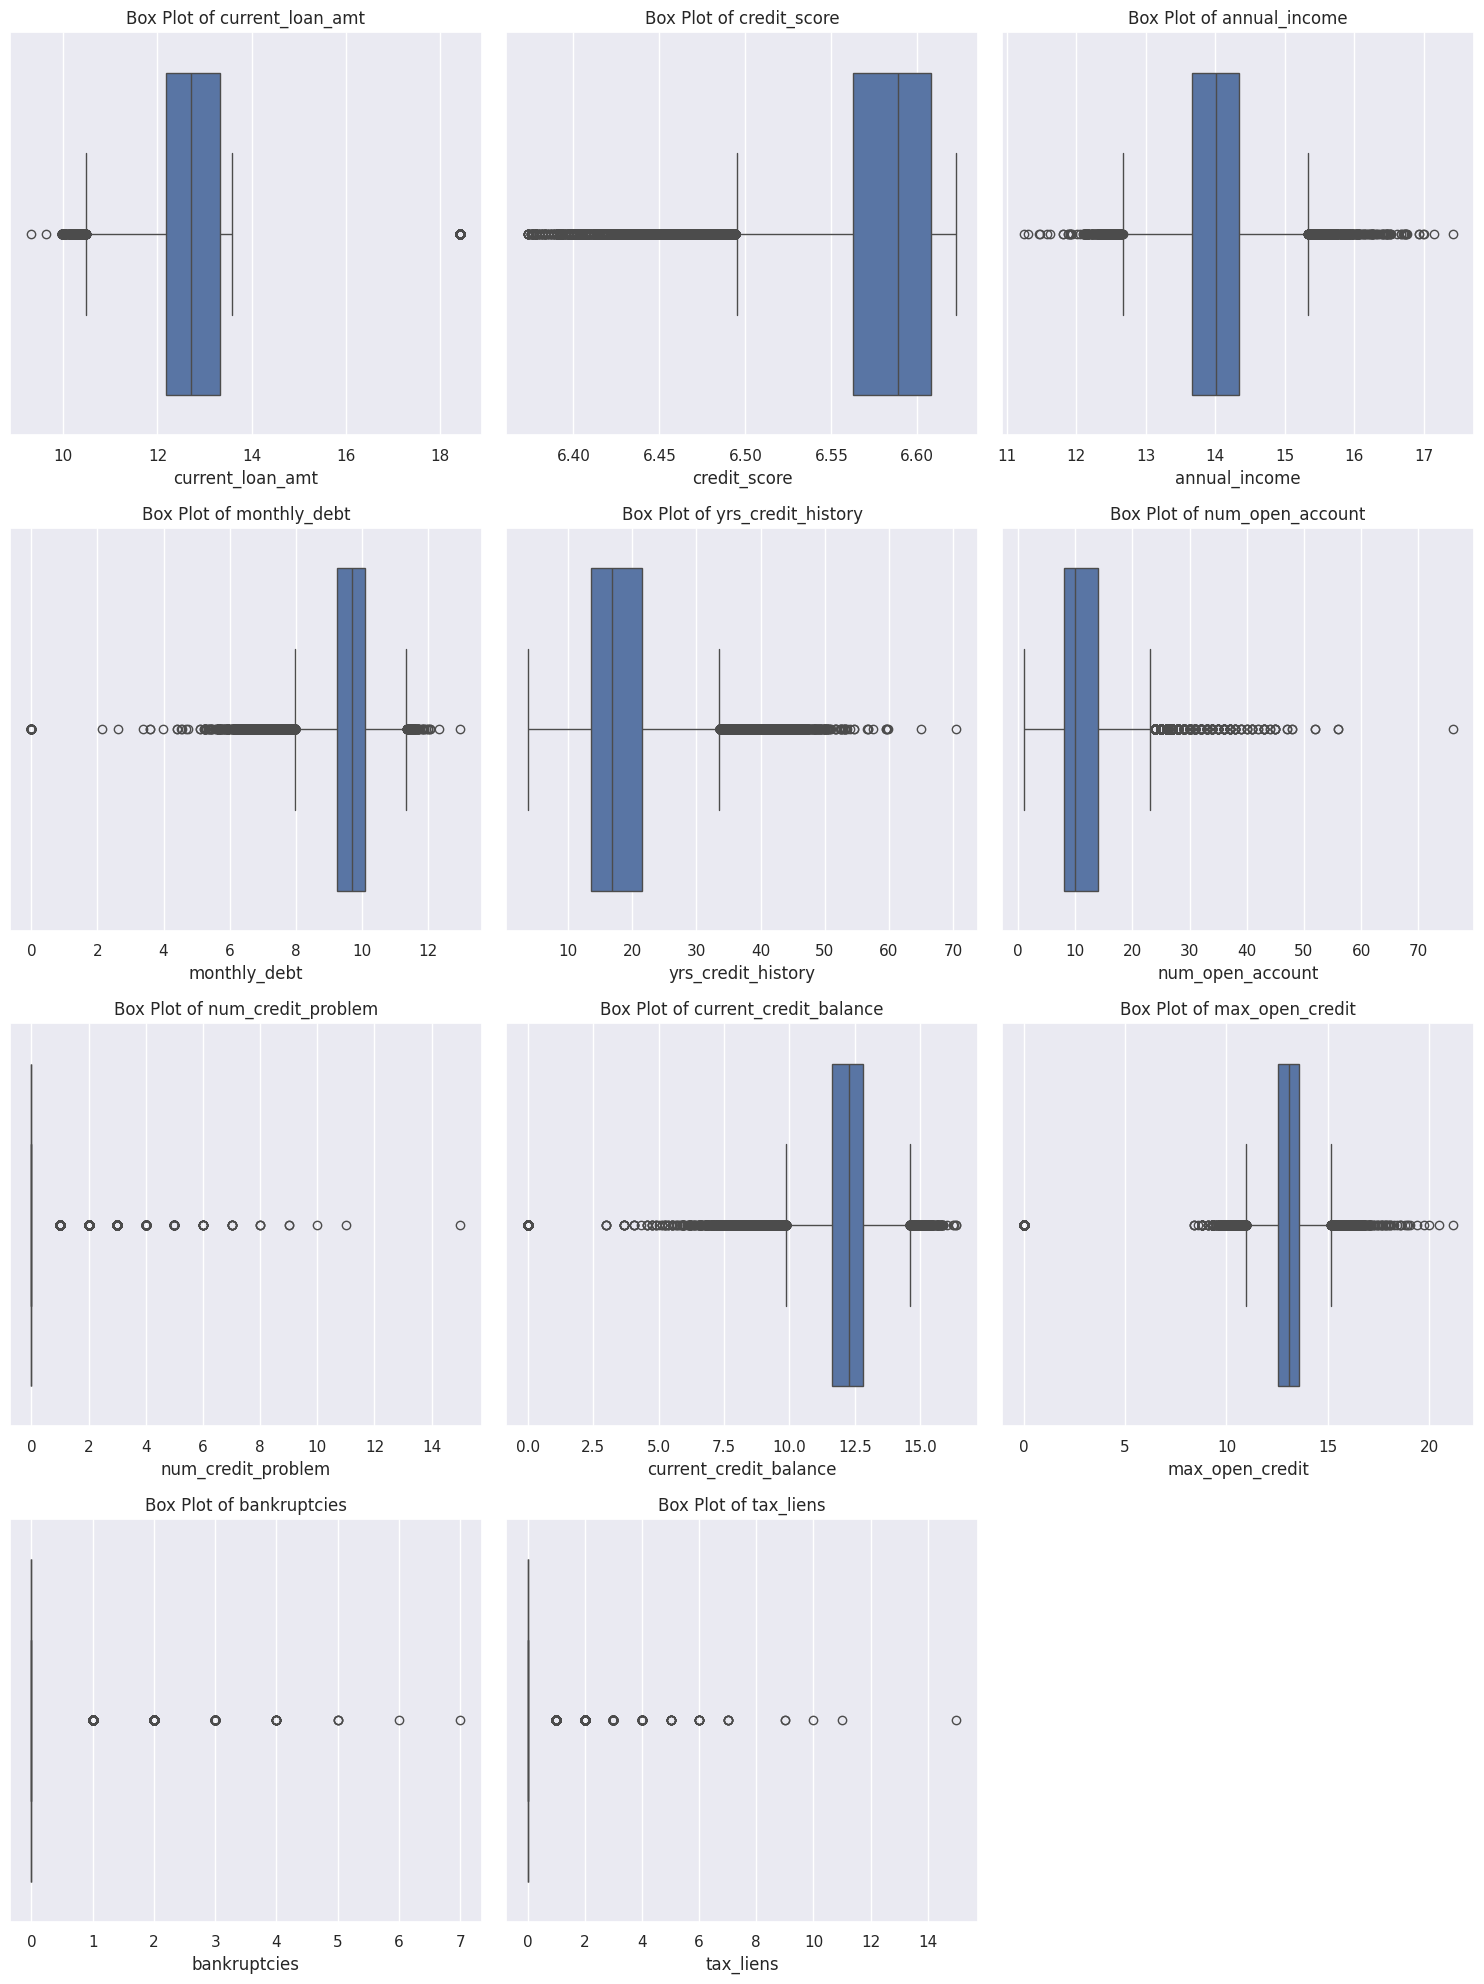

In [31]:
# Function to detect and visualize outliers using box plots after outlier trimmming
def detect_outliers(data, columns, num_cols=3):
    num_rows = (len(columns) + num_cols - 1) // num_cols # Calculate rows needed
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows)) # Adjust figsize as needed
    axes = axes.flatten() # Flatten the array for easier indexing

    for i, column in enumerate(columns):
        sns.boxplot(x=data[column], ax=axes[i])
        axes[i].set_title(f'Box Plot of {column}')

    # Hide empty subplots if any
    for i in range(len(columns), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout() # Adjust spacing for better layout
    plt.show()

# Get numerical columns
numerical_cols = df._get_numeric_data().columns.to_list()

# Detect and visualize outliers in a 3-column grid
detect_outliers(df, numerical_cols)

# **Models Used**

# **Handling Imbalance with SMOTE**





In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [33]:
# Since Home_ownership, Yrs_current_job, Loan_status, Purpose & Term is Categorical, coverting it to Numerical form

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['home_ownership'] = le.fit_transform(df['home_ownership'])
df['yrs_current_job'] = le.fit_transform(df['yrs_current_job'])
df['loan_status'] = le.fit_transform(df['loan_status'])
df['purpose'] = le.fit_transform(df['purpose'])
df['term'] = le.fit_transform(df['term'])

In [34]:
df[['home_ownership','yrs_current_job','loan_status','purpose','term']].nunique()

,0
home_ownership,4
yrs_current_job,11
loan_status,2
purpose,16
term,2


In [35]:
# Create Dummy Variables for Home_ownership, Purpose & Term
# Since Yrs_current_job is ordrinal we won't be using for Dummy Variables
# One-Hot Encoding

c1 = pd.get_dummies(df['home_ownership'],drop_first=True,prefix='home_ownership')
c2 = pd.get_dummies(df['purpose'],drop_first=True,prefix='purpose')
c3 = pd.get_dummies(df['term'],drop_first=True,prefix='term')
c4 = pd.get_dummies(df['yrs_current_job'],drop_first=True,prefix='yrs_job')

dfc = pd.concat([c1,c2,c3,c4],axis=1)
dfc.head()

,home_ownership_1,home_ownership_2,home_ownership_3,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7,...,yrs_job_1,yrs_job_2,yrs_job_3,yrs_job_4,yrs_job_5,yrs_job_6,yrs_job_7,yrs_job_8,yrs_job_9,yrs_job_10
0,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,True,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
6,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8,False,False,True,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [36]:
# Actual Dummies

df.drop(['yrs_current_job','home_ownership','purpose','term'],axis=1,inplace=True)
dfd = pd.concat([df,dfc],axis=1)
dfd.head()

,loan_status,current_loan_amt,credit_score,annual_income,monthly_debt,yrs_credit_history,num_open_account,num_credit_problem,current_credit_balance,max_open_credit,...,yrs_job_1,yrs_job_2,yrs_job_3,yrs_job_4,yrs_job_5,yrs_job_6,yrs_job_7,yrs_job_8,yrs_job_9,yrs_job_10
0,1,13.006757,6.565265,13.970370,8.559436,17.2,6,1,12.337938,12.940235,...,False,False,False,False,False,False,False,True,False,False
2,1,18.420681,6.609349,14.618361,10.281976,14.9,18,1,12.604839,13.527950,...,False,False,False,False,False,False,False,True,False,False
3,1,12.759000,6.582025,13.601017,9.075997,12.0,9,0,12.454221,12.866074,...,False,False,True,False,False,False,False,False,False,False
6,1,12.290630,6.594413,13.984574,9.292481,19.6,13,1,11.713177,12.513752,...,False,False,False,False,False,False,False,False,False,True
8,1,13.215393,6.520621,14.755170,9.834206,22.6,4,0,12.988082,13.226794,...,False,True,False,False,False,False,False,False,False,False


In [37]:
# Independent variable
X = dfd.drop(['loan_status'], axis = 1)

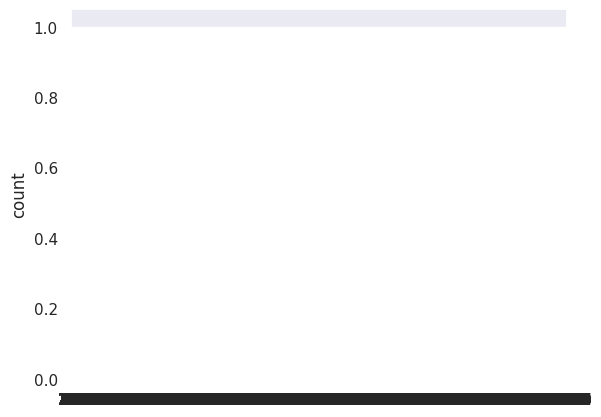

In [38]:

# Dependent variable
y = dfd['loan_status']

# Loan Status Distribution using SMOTE oversampling method to handle the imbalance problem
sns.countplot(df['loan_status'])
plt.show()

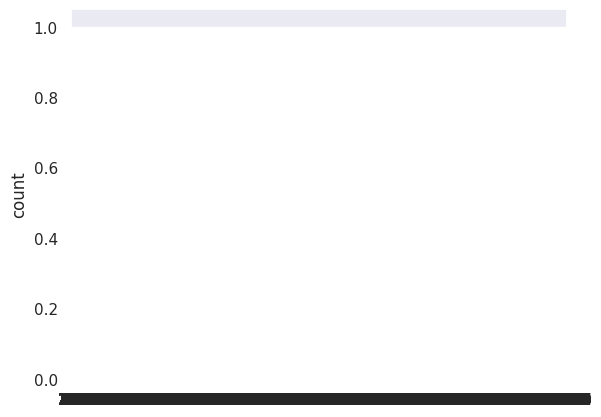

In [39]:
# Loan Status Distribution
# Using SMOTE oversampling method to handle the imbalance problem

sns.countplot(df['loan_status'])
plt.show()

In [40]:
# Imbalanced variable

y.value_counts()

,count
loan_status,
1,51386
0,11948


In [41]:
# SMOTE(Synthetic Minority Oversampling Technique) to handle imbalance dataset

from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority')
# Use fit_resample instead of fit_sample
X_sm, y_sm = sm.fit_resample(X, y)

In [42]:
# After SMOTE, balanced variable

np.bincount(y_sm)

array([51386, 51386])

In [43]:
# Train-Test Split

X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,stratify=y_sm,test_size=.3,random_state=0)

In [44]:
# Checking data split

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(71940, 40)
(71940,)
(30832, 40)
(30832,)


In [45]:
# Checking balanced features

y_train.value_counts()

,count
loan_status,
0,35970
1,35970


In [46]:
y_test.value_counts()

,count
loan_status,
1,15416
0,15416


# **Decision Tree Classifier**

In [ ]:
from sklearn.metrics import (recall_score, precision_score, f1_score, accuracy_score, confusion_matrix,log_loss, roc_curve, auc)
from sklearn.model_selection import learning_curve

Recall Score for training data is 0.9108423686405338
Precision Score for training data is 0.9543547917273522
F1 Score for training data is 0.9320910384068278
Accuracy Score for training data is 0.9336391437308869


Recall Score for testing data is 0.7135443694862481
Precision Score for testing data is 0.7698229407236336
F1 Score for testing data is 0.74061605790271
Accuracy Score for testing data is 0.7500973015049299


Confusion Matrix for training data is:
[[34403  1567]
 [ 3207 32763]]


Confusion Matrix for testing data is:
[[12127  3289]
 [ 4416 11000]]


Log Loss for training data: 0.1299
Log Loss for testing data: 5.7762




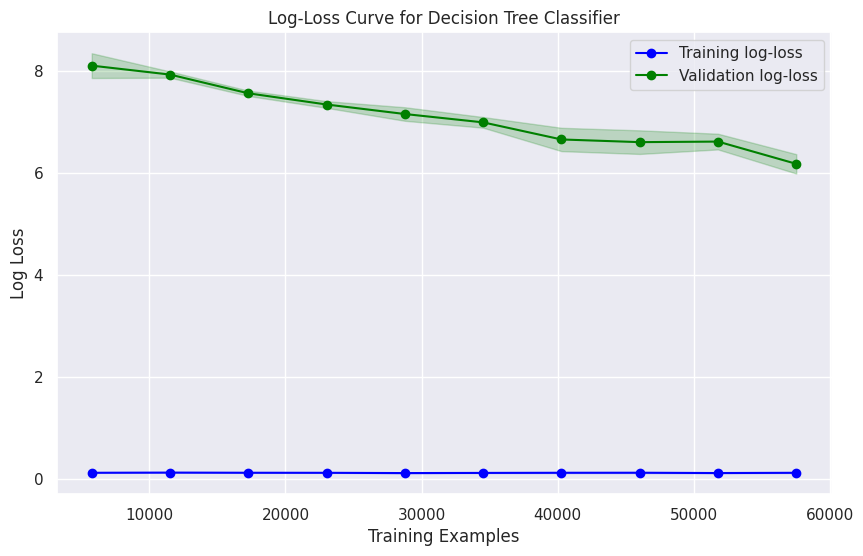

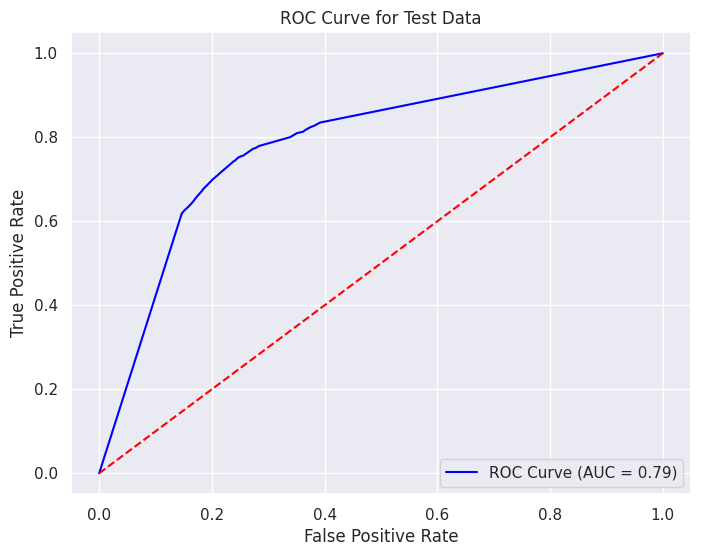

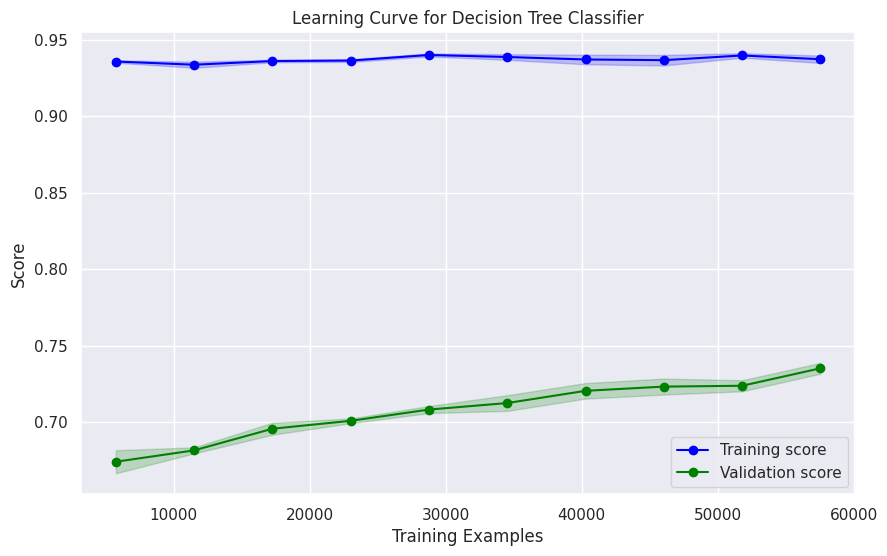

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dc = DecisionTreeClassifier(max_depth=50, min_samples_split=5, random_state=42)

# Fit the model
dc.fit(X_train, y_train)

# Predictions
y_train_pred = dc.predict(X_train)
y_test_pred = dc.predict(X_test)

# Probability predictions for log-loss and ROC curve
y_train_prob = dc.predict_proba(X_train)
y_test_prob = dc.predict_proba(X_test)

# Scores
print('Recall Score for training data is', recall_score(y_train, y_train_pred))
print('Precision Score for training data is', precision_score(y_train, y_train_pred))
print('F1 Score for training data is', f1_score(y_train, y_train_pred))
print('Accuracy Score for training data is', accuracy_score(y_train, y_train_pred))
print('\n')
print('Recall Score for testing data is', recall_score(y_test, y_test_pred))
print('Precision Score for testing data is', precision_score(y_test, y_test_pred))
print('F1 Score for testing data is', f1_score(y_test, y_test_pred))
print('Accuracy Score for testing data is', accuracy_score(y_test, y_test_pred))
print('\n')

# Confusion Matrix
print('Confusion Matrix for training data is:')
print(confusion_matrix(y_train, y_train_pred))
print('\n')
print('Confusion Matrix for testing data is:')
print(confusion_matrix(y_test, y_test_pred))
print('\n')

# Log-loss
train_log_loss = log_loss(y_train, y_train_prob)
test_log_loss = log_loss(y_test, y_test_prob)
print(f'Log Loss for training data: {train_log_loss:.4f}')
print(f'Log Loss for testing data: {test_log_loss:.4f}')
print('\n')

# Log-Loss Curve
def plot_log_loss_curve(estimator, X, y, title="Log-Loss Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='neg_log_loss', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training log-loss')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation log-loss')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Log Loss')
    plt.legend(loc='best')
    plt.show()

plot_log_loss_curve(dc, X_train, y_train, title="Log-Loss Curve for Decision Tree Classifier")
print('\n')

# ROC Curve
def plot_roc_curve(y_true, y_prob, title="ROC Curve"):
    fpr, tpr, _ = roc_curve(y_true, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(y_test, y_test_prob, title="ROC Curve for Test Data")
print('\n')

# Train-Test Learning Curve
def plot_learning_curve(estimator, X, y, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.show()

plot_learning_curve(dc, X_train, y_train, title="Learning Curve for Decision Tree Classifier")


# **KNN (K nearest neighbors)**

Recall Score for training data is 0.7667500695023631
Precision Score for training data is 0.9686369543075897
F1 Score for training data is 0.855950219573887
Accuracy Score for training data is 0.870961912705032


Recall Score for testing data is 0.661909704203425
Precision Score for testing data is 0.9129462288628434
F1 Score for testing data is 0.7674199977437671
Accuracy Score for testing data is 0.7993967306694344


Confusion Matrix for training data is:
[[35077   893]
 [ 8390 27580]]


Confusion Matrix for testing data is:
[[14443   973]
 [ 5212 10204]]


Log Loss for training data: 0.2695
Log Loss for testing data: 1.3649




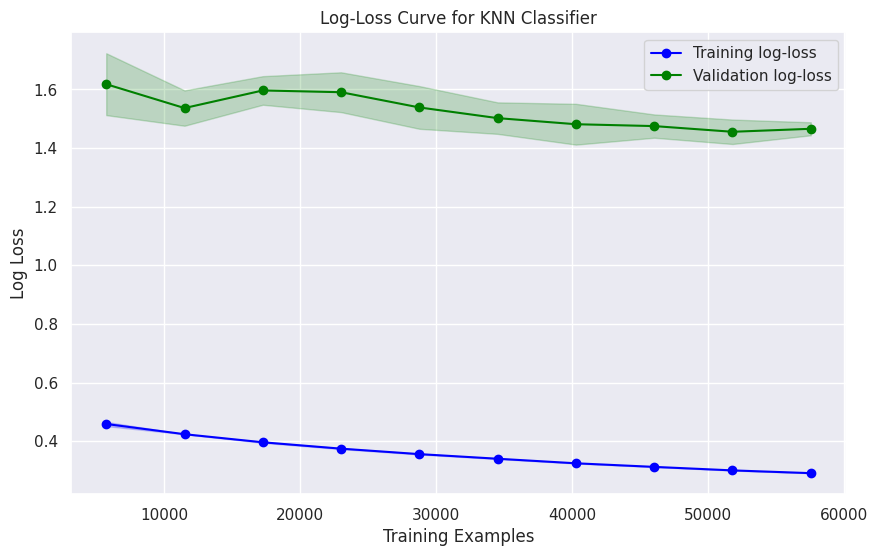

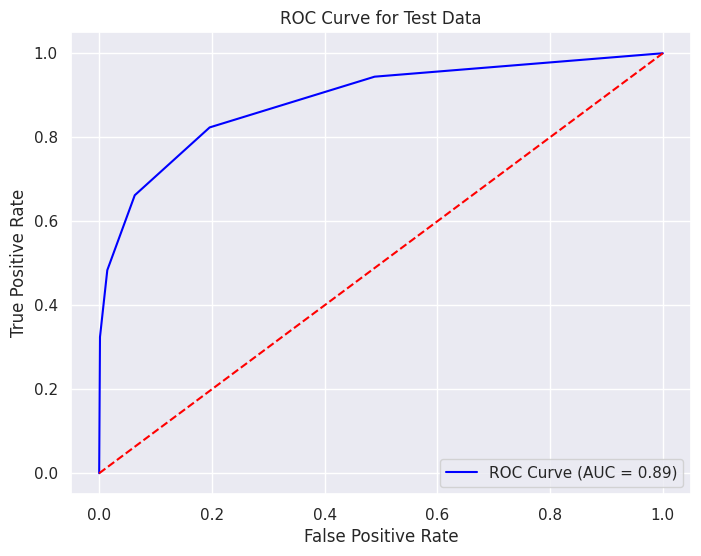

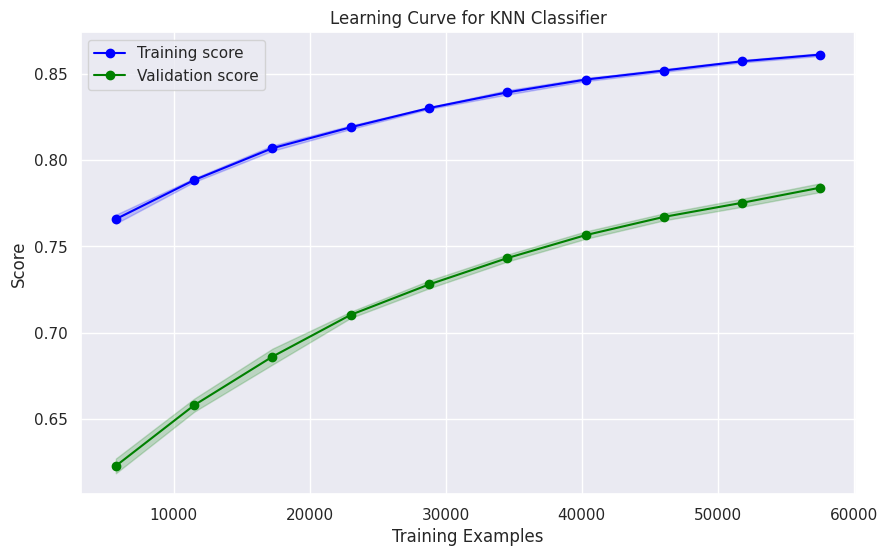

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train, y_train)

# Predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Probability predictions for log-loss and ROC curve
y_train_prob = knn.predict_proba(X_train)
y_test_prob = knn.predict_proba(X_test)

# Scores
print('Recall Score for training data is', recall_score(y_train, y_train_pred))
print('Precision Score for training data is', precision_score(y_train, y_train_pred))
print('F1 Score for training data is', f1_score(y_train, y_train_pred))
print('Accuracy Score for training data is', accuracy_score(y_train, y_train_pred))
print('\n')
print('Recall Score for testing data is', recall_score(y_test, y_test_pred))
print('Precision Score for testing data is', precision_score(y_test, y_test_pred))
print('F1 Score for testing data is', f1_score(y_test, y_test_pred))
print('Accuracy Score for testing data is', accuracy_score(y_test, y_test_pred))
print('\n')

# Confusion Matrix
print('Confusion Matrix for training data is:')
print(confusion_matrix(y_train, y_train_pred))
print('\n')
print('Confusion Matrix for testing data is:')
print(confusion_matrix(y_test, y_test_pred))
print('\n')

# Log-loss
train_log_loss = log_loss(y_train, y_train_prob)
test_log_loss = log_loss(y_test, y_test_prob)
print(f'Log Loss for training data: {train_log_loss:.4f}')
print(f'Log Loss for testing data: {test_log_loss:.4f}')
print('\n')

# Log-Loss Curve
def plot_log_loss_curve(estimator, X, y, title="Log-Loss Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='neg_log_loss', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training log-loss')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation log-loss')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Log Loss')
    plt.legend(loc='best')
    plt.show()

plot_log_loss_curve(knn, X_train, y_train, title="Log-Loss Curve for KNN Classifier")
print('\n\n')

# ROC Curve
def plot_roc_curve(y_true, y_prob, title="ROC Curve"):
    fpr, tpr, _ = roc_curve(y_true, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(y_test, y_test_prob, title="ROC Curve for Test Data")
print('\n\n')

# Train-Test Learning Curve
def plot_learning_curve(estimator, X, y, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.show()

plot_learning_curve(knn, X_train, y_train, title="Learning Curve for KNN Classifier")


# **Random Forest Classifier**

Recall Score for training data is 1.0
Precision Score for training data is 0.9995276071914858
F1 Score for training data is 0.9997637477938213
Accuracy Score for training data is 0.9997636919655268


Recall Score for testing data is 0.8023482096523092
Precision Score for testing data is 0.8611111111111112
F1 Score for testing data is 0.8306917394224311
Accuracy Score for testing data is 0.8364686040477426



Confusion Matrix for training data is:
[[35953    17]
 [    0 35970]]


Confusion Matrix for testing data is:
[[13421  1995]
 [ 3047 12369]]



Log Loss for training data: 0.1747
Log Loss for testing data: 0.4052





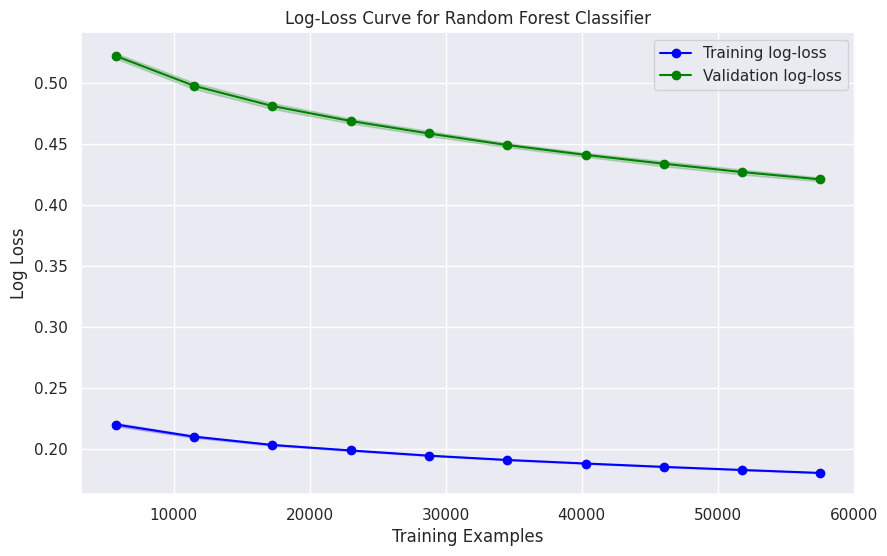

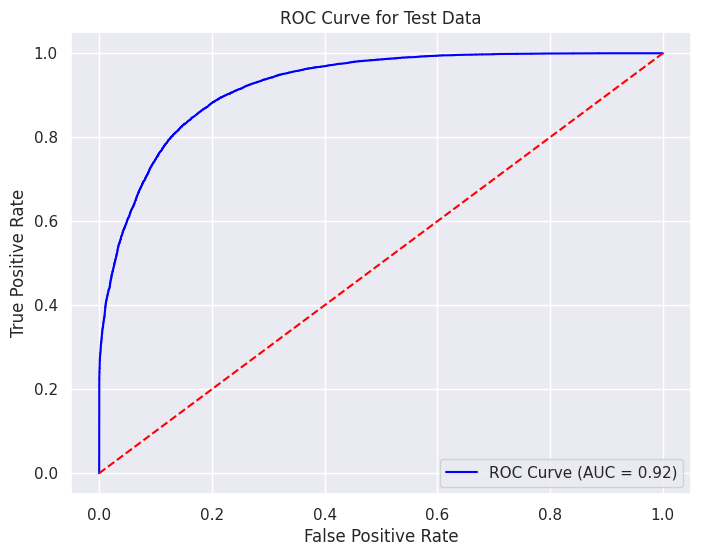

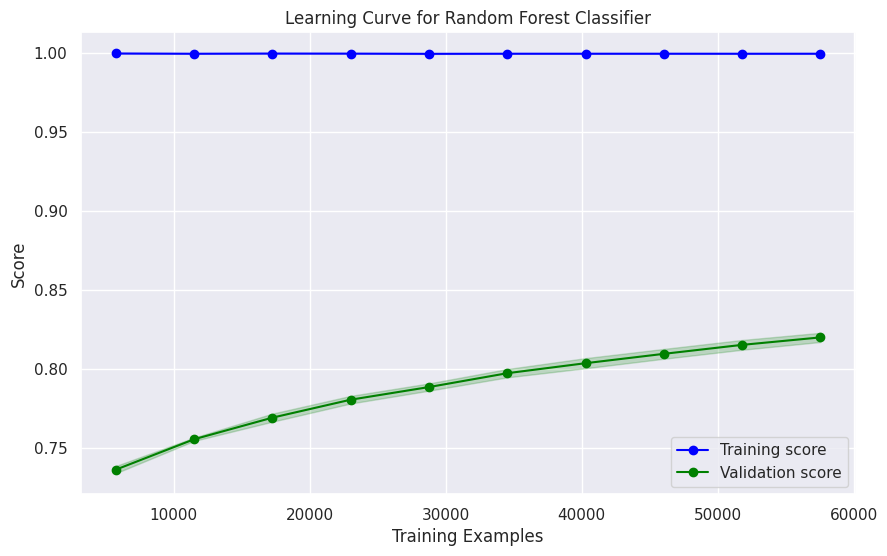

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (recall_score, precision_score, f1_score, accuracy_score, confusion_matrix,log_loss, roc_curve, auc)
from sklearn.model_selection import learning_curve

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=500, max_depth=50, min_samples_split=5, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Probability predictions for log-loss and ROC curve
y_train_prob = rf.predict_proba(X_train)
y_test_prob = rf.predict_proba(X_test)

# Scores
print('Recall Score for training data is', recall_score(y_train, y_train_pred))
print('Precision Score for training data is', precision_score(y_train, y_train_pred))
print('F1 Score for training data is', f1_score(y_train, y_train_pred))
print('Accuracy Score for training data is', accuracy_score(y_train, y_train_pred))
print('\n')
print('Recall Score for testing data is', recall_score(y_test, y_test_pred))
print('Precision Score for testing data is', precision_score(y_test, y_test_pred))
print('F1 Score for testing data is', f1_score(y_test, y_test_pred))
print('Accuracy Score for testing data is', accuracy_score(y_test, y_test_pred))
print('\n\n')

# Confusion Matrix
print('Confusion Matrix for training data is:')
print(confusion_matrix(y_train, y_train_pred))
print('\n')
print('Confusion Matrix for testing data is:')
print(confusion_matrix(y_test, y_test_pred))
print('\n\n')

# Log-loss
train_log_loss = log_loss(y_train, y_train_prob)
test_log_loss = log_loss(y_test, y_test_prob)
print(f'Log Loss for training data: {train_log_loss:.4f}')
print(f'Log Loss for testing data: {test_log_loss:.4f}')
print('\n\n')

# Log-Loss Curve
def plot_log_loss_curve(estimator, X, y, title="Log-Loss Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='neg_log_loss', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training log-loss')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation log-loss')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Log Loss')
    plt.legend(loc='best')
    plt.show()

plot_log_loss_curve(rf, X_train, y_train, title="Log-Loss Curve for Random Forest Classifier")
print('\n\n')

# ROC Curve
def plot_roc_curve(y_true, y_prob, title="ROC Curve"):
    fpr, tpr, _ = roc_curve(y_true, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(y_test, y_test_prob, title="ROC Curve for Test Data")
print('\n\n')

# Train-Test Learning Curve
def plot_learning_curve(estimator, X, y, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.show()

plot_learning_curve(rf, X_train, y_train, title="Learning Curve for Random Forest Classifier")


# **Logistic Regression Classifier**

Recall Score for training data is 0.7271615234917987
Precision Score for training data is 0.7281939920376402
F1 Score for training data is 0.7276773915341708
Accuracy Score for training data is 0.7278704475952182


Recall Score for testing data is 0.7253502854177478
Precision Score for testing data is 0.7290389881340461
F1 Score for testing data is 0.7271899590297197
Accuracy Score for testing data is 0.7278801245459263



Confusion Matrix for training data is:
[[26207  9763]
 [ 9814 26156]]


Confusion Matrix for testing data is:
[[11260  4156]
 [ 4234 11182]]



Log Loss for training data: 0.4953
Log Loss for testing data: 0.4972





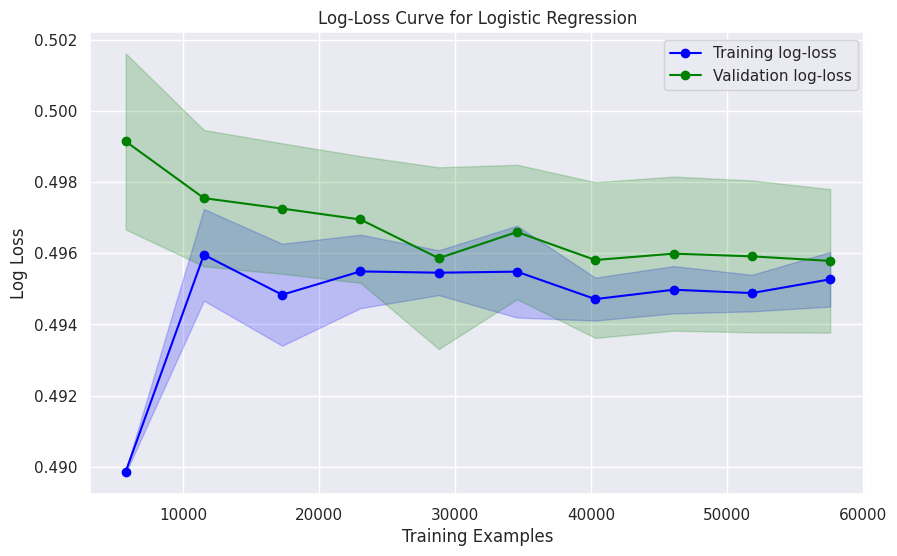

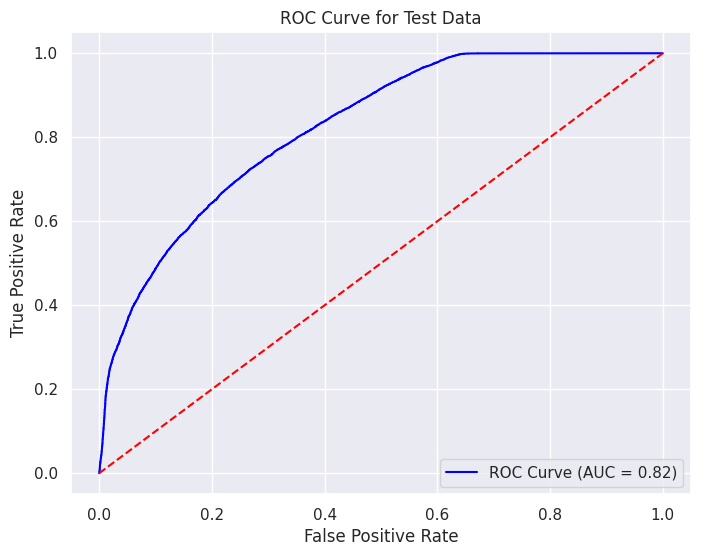

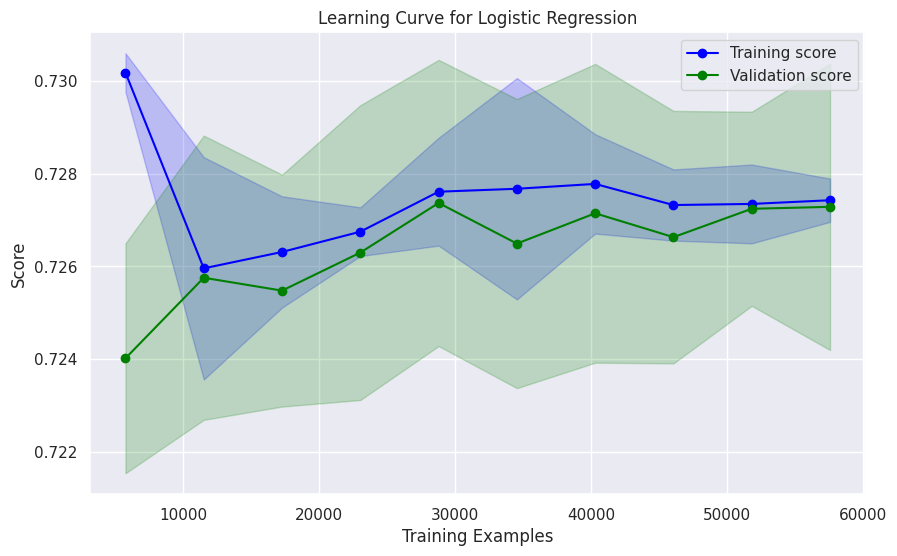

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, log_loss, roc_curve, auc)
from sklearn.model_selection import learning_curve

# Initialize the Logistic Regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

# Fit the model
logreg.fit(X_train, y_train)

# Predictions
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Probability predictions for log-loss and ROC curve
y_train_prob = logreg.predict_proba(X_train)
y_test_prob = logreg.predict_proba(X_test)

# Scores
print('Recall Score for training data is', recall_score(y_train, y_train_pred))
print('Precision Score for training data is', precision_score(y_train, y_train_pred))
print('F1 Score for training data is', f1_score(y_train, y_train_pred))
print('Accuracy Score for training data is', accuracy_score(y_train, y_train_pred))
print('\n')
print('Recall Score for testing data is', recall_score(y_test, y_test_pred))
print('Precision Score for testing data is', precision_score(y_test, y_test_pred))
print('F1 Score for testing data is', f1_score(y_test, y_test_pred))
print('Accuracy Score for testing data is', accuracy_score(y_test, y_test_pred))
print('\n\n')

# Confusion Matrix
print('Confusion Matrix for training data is:')
print(confusion_matrix(y_train, y_train_pred))
print('\n')
print('Confusion Matrix for testing data is:')
print(confusion_matrix(y_test, y_test_pred))
print('\n\n')

# Log-loss
train_log_loss = log_loss(y_train, y_train_prob)
test_log_loss = log_loss(y_test, y_test_prob)
print(f'Log Loss for training data: {train_log_loss:.4f}')
print(f'Log Loss for testing data: {test_log_loss:.4f}')
print('\n\n')

# Log-Loss Curve
def plot_log_loss_curve(estimator, X, y, title="Log-Loss Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='neg_log_loss', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training log-loss')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation log-loss')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Log Loss')
    plt.legend(loc='best')
    plt.show()

plot_log_loss_curve(logreg, X_train, y_train, title="Log-Loss Curve for Logistic Regression")
print('\n\n')

# ROC Curve
def plot_roc_curve(y_true, y_prob, title="ROC Curve"):
    fpr, tpr, _ = roc_curve(y_true, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(y_test, y_test_prob, title="ROC Curve for Test Data")
print('\n\n')

# Train-Test Learning Curve
def plot_learning_curve(estimator, X, y, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.show()

plot_learning_curve(logreg, X_train, y_train, title="Learning Curve for Logistic Regression")

# **XG Boosting**

Recall Score for training data is 0.9002224075618571
Precision Score for training data is 0.8751385097700062
F1 Score for training data is 0.8875032547176276
Accuracy Score for training data is 0.88589102029469


Recall Score for testing data is 0.8382200311364816
Precision Score for testing data is 0.815422477440525
F1 Score for testing data is 0.8266641077311838
Accuracy Score for testing data is 0.8242410482615464



Confusion Matrix for training data is:
[[31350  4620]
 [ 3589 32381]]


Confusion Matrix for testing data is:
[[12491  2925]
 [ 2494 12922]]



Log Loss for training data: 0.3005
Log Loss for testing data: 0.3701





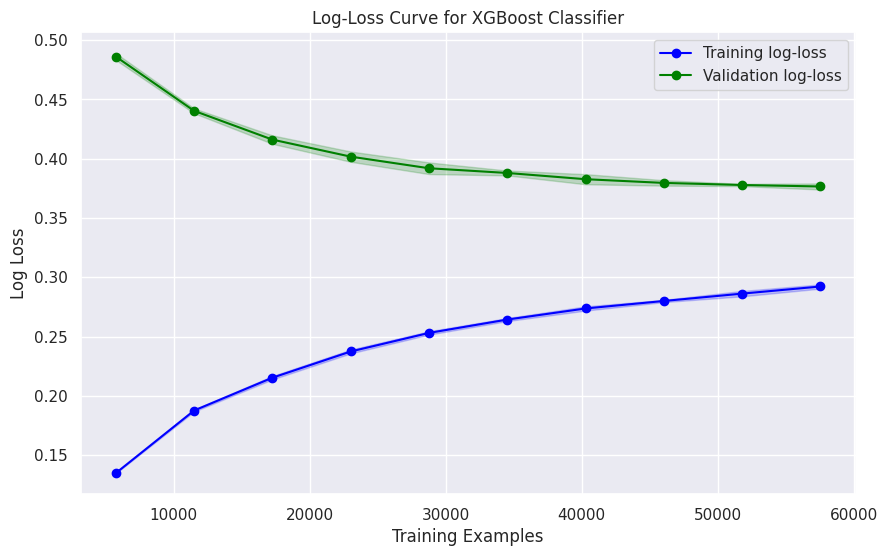

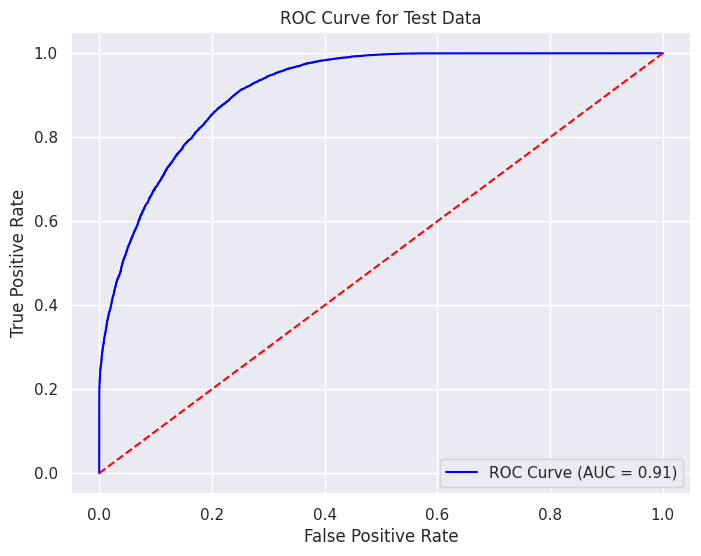

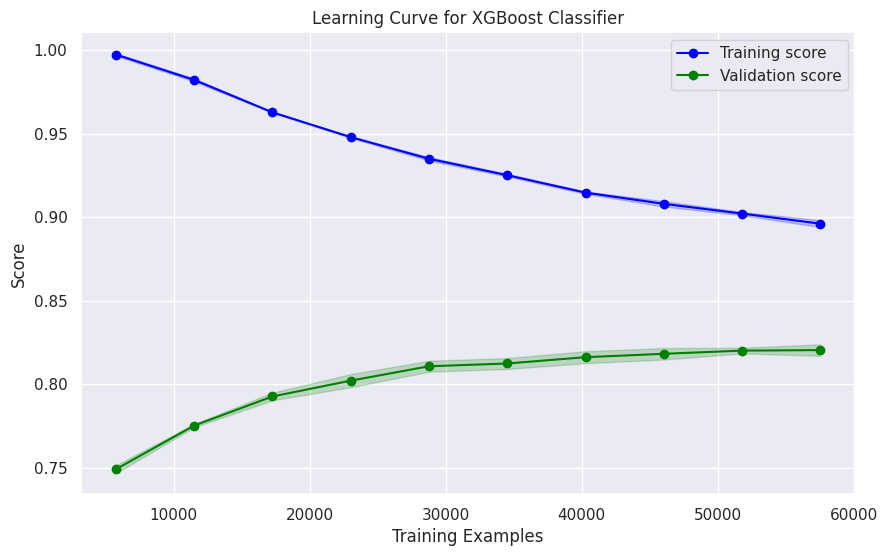

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import (recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, log_loss, roc_curve, auc)
from sklearn.model_selection import learning_curve

# Initialize the XGBoost Classifier
xgb = XGBClassifier(n_estimators=500, max_depth=8, learning_rate=0.05,subsample=0.8,
    colsample_bytree=0.8,reg_alpha=1, reg_lambda=1, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Fit the model
xgb.fit(X_train, y_train)

# Predictions
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Probability predictions for log-loss and ROC curve
y_train_prob = xgb.predict_proba(X_train)
y_test_prob = xgb.predict_proba(X_test)

# Scores
print('Recall Score for training data is', recall_score(y_train, y_train_pred))
print('Precision Score for training data is', precision_score(y_train, y_train_pred))
print('F1 Score for training data is', f1_score(y_train, y_train_pred))
print('Accuracy Score for training data is', accuracy_score(y_train, y_train_pred))
print('\n')
print('Recall Score for testing data is', recall_score(y_test, y_test_pred))
print('Precision Score for testing data is', precision_score(y_test, y_test_pred))
print('F1 Score for testing data is', f1_score(y_test, y_test_pred))
print('Accuracy Score for testing data is', accuracy_score(y_test, y_test_pred))
print('\n\n')

# Confusion Matrix
print('Confusion Matrix for training data is:')
print(confusion_matrix(y_train, y_train_pred))
print('\n')
print('Confusion Matrix for testing data is:')
print(confusion_matrix(y_test, y_test_pred))
print('\n\n')

# Log-loss
train_log_loss = log_loss(y_train, y_train_prob)
test_log_loss = log_loss(y_test, y_test_prob)
print(f'Log Loss for training data: {train_log_loss:.4f}')
print(f'Log Loss for testing data: {test_log_loss:.4f}')
print('\n\n')

# Log-Loss Curve
def plot_log_loss_curve(estimator, X, y, title="Log-Loss Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='neg_log_loss', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training log-loss')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation log-loss')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Log Loss')
    plt.legend(loc='best')
    plt.show()

plot_log_loss_curve(xgb, X_train, y_train, title="Log-Loss Curve for XGBoost Classifier")
print('\n\n')

# ROC Curve
def plot_roc_curve(y_true, y_prob, title="ROC Curve"):
    fpr, tpr, _ = roc_curve(y_true, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(y_test, y_test_prob, title="ROC Curve for Test Data")
print('\n\n')

# Train-Test Learning Curve
def plot_learning_curve(estimator, X, y, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.show()

plot_learning_curve(xgb, X_train, y_train, title="Learning Curve for XGBoost Classifier")


# **LightGBM**

[LightGBM] [Info] Number of positive: 35970, number of negative: 35970
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2410
[LightGBM] [Info] Number of data points in the train set: 71940, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Recall Score for training data is 0.8646371976647206
Precision Score for training data is 0.8277927124644008
F1 Score for training data is 0.8458138997294027
Accuracy Score for training data is 0.8423825410063942


Recall Score for testing data is 0.8518422418266736
Precision Score for testing data is 0.8234261349385503
F1 Score for testing data is 0.8373931896441781
Accuracy Score for testing data is 0.834587441619097



Confusion Matrix for training data is:
[[29500  6470]
 [ 4869 31101]]

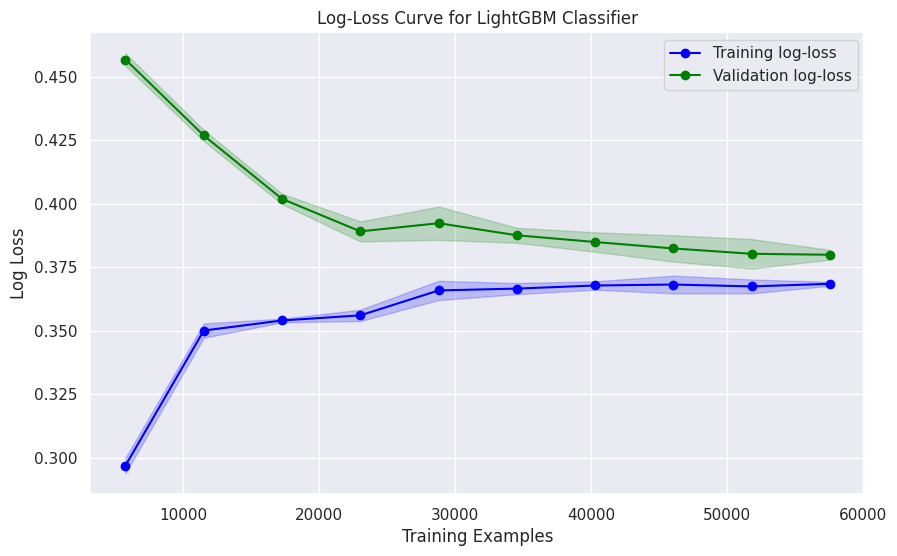

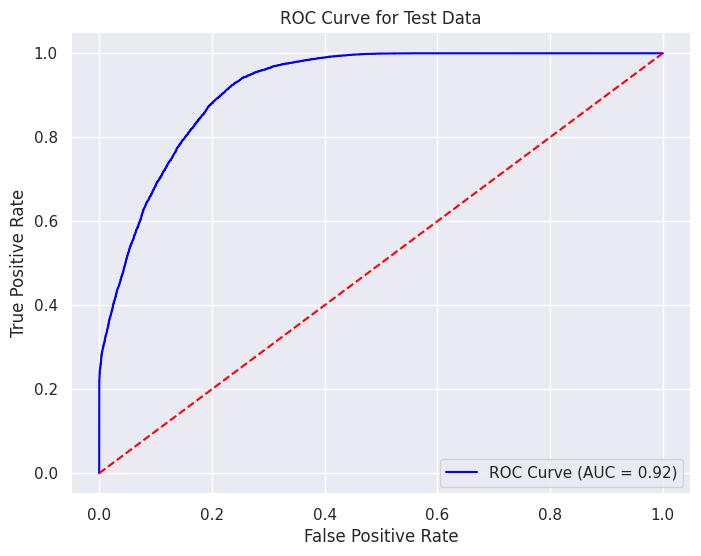

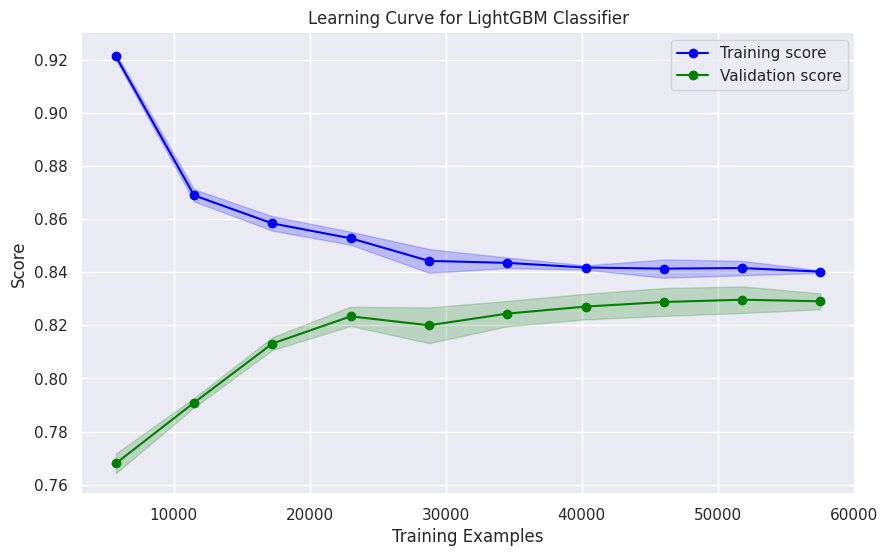

In [ ]:
import lightgbm as lgb
from sklearn.metrics import (
    recall_score, precision_score, f1_score, accuracy_score,
    confusion_matrix, log_loss, roc_curve, auc
)
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Initialize the LightGBM Classifier
lgbm = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,
    num_leaves=31,  # Default, controls tree structure
    random_state=42
)

# Fit the model
lgbm.fit(X_train, y_train)

# Predictions
y_train_pred = lgbm.predict(X_train)
y_test_pred = lgbm.predict(X_test)

# Probability predictions for log-loss and ROC curve
y_train_prob = lgbm.predict_proba(X_train)
y_test_prob = lgbm.predict_proba(X_test)

# Scores
print('\n\nRecall Score for training data is', recall_score(y_train, y_train_pred))
print('Precision Score for training data is', precision_score(y_train, y_train_pred))
print('F1 Score for training data is', f1_score(y_train, y_train_pred))
print('Accuracy Score for training data is', accuracy_score(y_train, y_train_pred))
print('\n')
print('Recall Score for testing data is', recall_score(y_test, y_test_pred))
print('Precision Score for testing data is', precision_score(y_test, y_test_pred))
print('F1 Score for testing data is', f1_score(y_test, y_test_pred))
print('Accuracy Score for testing data is', accuracy_score(y_test, y_test_pred))
print('\n\n')

# Confusion Matrix
print('Confusion Matrix for training data is:')
print(confusion_matrix(y_train, y_train_pred))
print('\n')
print('Confusion Matrix for testing data is:')
print(confusion_matrix(y_test, y_test_pred))
print('\n\n')

# Log-loss
train_log_loss = log_loss(y_train, y_train_prob)
test_log_loss = log_loss(y_test, y_test_prob)
print(f'Log Loss for training data: {train_log_loss:.4f}')
print(f'Log Loss for testing data: {test_log_loss:.4f}')
print('\n\n')

# Log-Loss Curve
def plot_log_loss_curve(estimator, X, y, title="Log-Loss Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='neg_log_loss', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training log-loss')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation log-loss')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Log Loss')
    plt.legend(loc='best')
    plt.show()

plot_log_loss_curve(lgbm, X_train, y_train, title="Log-Loss Curve for LightGBM Classifier")
print('\n\n')

# ROC Curve
def plot_roc_curve(y_true, y_prob, title="ROC Curve"):
    fpr, tpr, _ = roc_curve(y_true, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(y_test, y_test_prob, title="ROC Curve for Test Data")
print('\n\n')

# Train-Test Learning Curve
def plot_learning_curve(estimator, X, y, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.show()

plot_learning_curve(lgbm, X_train, y_train, title="Learning Curve for LightGBM Classifier")


# **CatBoost**

In [ ]:
!pip install catboost

Recall Score for training data is 0.7829024186822352
Precision Score for training data is 0.7997103424774238
F1 Score for training data is 0.7912171274443696
Accuracy Score for training data is 0.7934111759799833


Recall Score for testing data is 0.7745848469122989
Precision Score for testing data is 0.8001206110962209
F1 Score for testing data is 0.7871456822676335
Accuracy Score for testing data is 0.7905422937208095



Confusion Matrix for training data is:
[[28917  7053]
 [ 7809 28161]]


Confusion Matrix for testing data is:
[[12433  2983]
 [ 3475 11941]]



Log Loss for training data: 0.4173
Log Loss for testing data: 0.4223





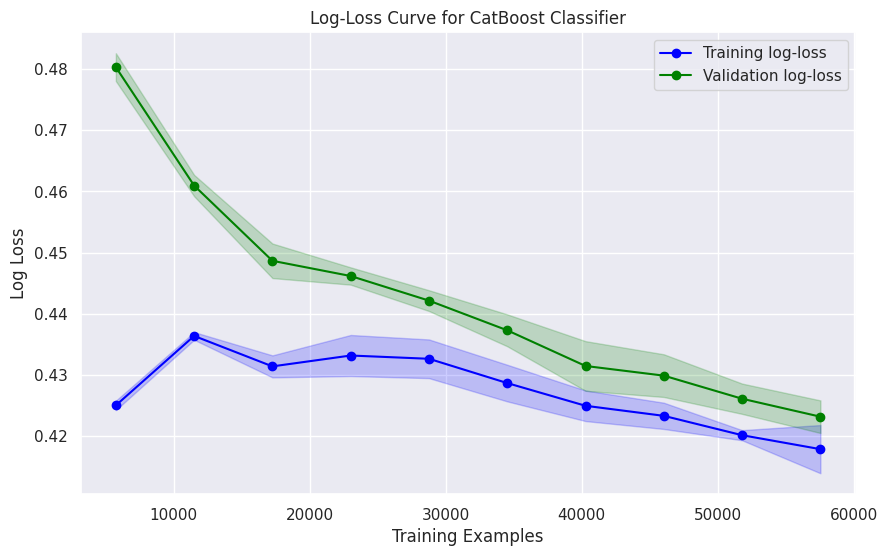

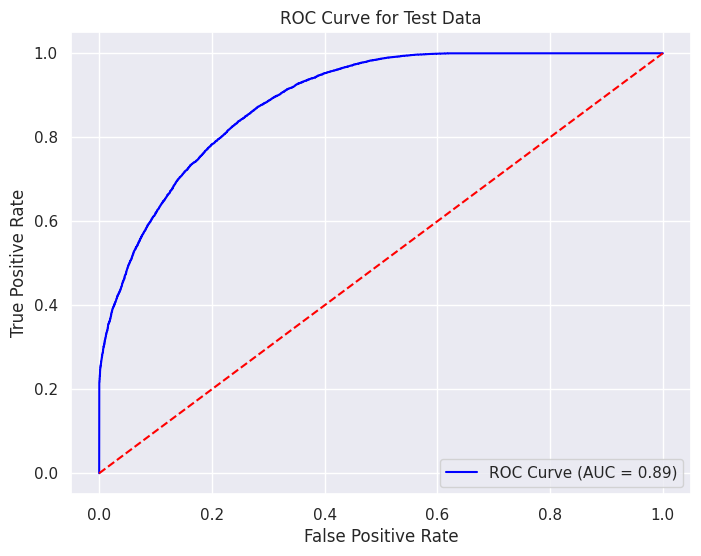

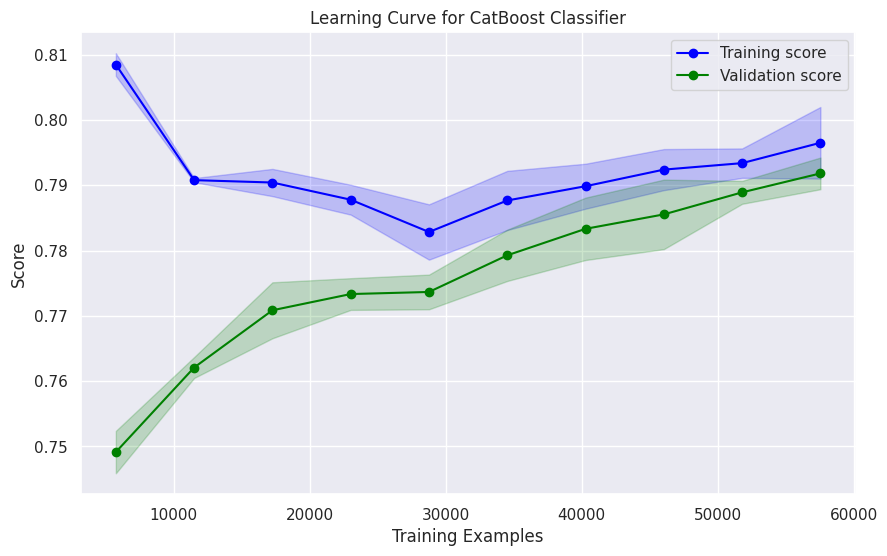

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import (recall_score, precision_score, f1_score, accuracy_score,confusion_matrix, log_loss, roc_curve, auc)
from sklearn.model_selection import learning_curve

# Initialize the CatBoost Classifier
catboost = CatBoostClassifier(
    iterations=100,         # Number of boosting rounds
    learning_rate=0.1,      # Learning rate
    depth=6,                # Depth of the trees
    random_state=42,
    verbose=0               # Set to 0 to suppress training output
)

# Fit the model
catboost.fit(X_train, y_train)

# Predictions
y_train_pred = catboost.predict(X_train)
y_test_pred = catboost.predict(X_test)

# Probability predictions for log-loss and ROC curve
y_train_prob = catboost.predict_proba(X_train)
y_test_prob = catboost.predict_proba(X_test)

# Scores
print('Recall Score for training data is', recall_score(y_train, y_train_pred))
print('Precision Score for training data is', precision_score(y_train, y_train_pred))
print('F1 Score for training data is', f1_score(y_train, y_train_pred))
print('Accuracy Score for training data is', accuracy_score(y_train, y_train_pred))
print('\n')
print('Recall Score for testing data is', recall_score(y_test, y_test_pred))
print('Precision Score for testing data is', precision_score(y_test, y_test_pred))
print('F1 Score for testing data is', f1_score(y_test, y_test_pred))
print('Accuracy Score for testing data is', accuracy_score(y_test, y_test_pred))
print('\n\n')

# Confusion Matrix
print('Confusion Matrix for training data is:')
print(confusion_matrix(y_train, y_train_pred))
print('\n')
print('Confusion Matrix for testing data is:')
print(confusion_matrix(y_test, y_test_pred))
print('\n\n')

# Log-loss
train_log_loss = log_loss(y_train, y_train_prob)
test_log_loss = log_loss(y_test, y_test_prob)
print(f'Log Loss for training data: {train_log_loss:.4f}')
print(f'Log Loss for testing data: {test_log_loss:.4f}')
print('\n\n')

# Log-Loss Curve
def plot_log_loss_curve(estimator, X, y, title="Log-Loss Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='neg_log_loss', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training log-loss')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation log-loss')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Log Loss')
    plt.legend(loc='best')
    plt.show()

plot_log_loss_curve(catboost, X_train, y_train, title="Log-Loss Curve for CatBoost Classifier")
print('\n\n')

# ROC Curve
def plot_roc_curve(y_true, y_prob, title="ROC Curve"):
    fpr, tpr, _ = roc_curve(y_true, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(y_test, y_test_prob, title="ROC Curve for Test Data")
print('\n\n')

# Train-Test Learning Curve
def plot_learning_curve(estimator, X, y, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.show()

plot_learning_curve(catboost, X_train, y_train, title="Learning Curve for CatBoost Classifier")


# **ADA Boosting**

Recall Score for training data is 0.6666944676118988
Precision Score for training data is 0.7974262627606158
F1 Score for training data is 0.7262238238723256
Accuracy Score for training data is 0.7486655546288574


Recall Score for testing data is 0.6574987026466009
Precision Score for testing data is 0.8013915243516762
F1 Score for testing data is 0.7223489167616876
Accuracy Score for testing data is 0.7472755578619616



Confusion Matrix for training data is:
[[29878  6092]
 [11989 23981]]


Confusion Matrix for testing data is:
[[12904  2512]
 [ 5280 10136]]



Log Loss for training data: 0.6718
Log Loss for testing data: 0.6725





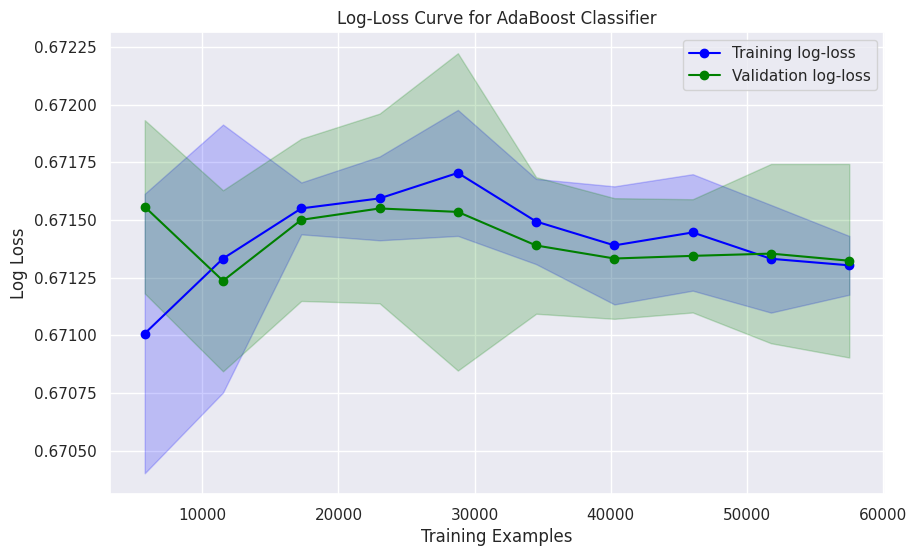

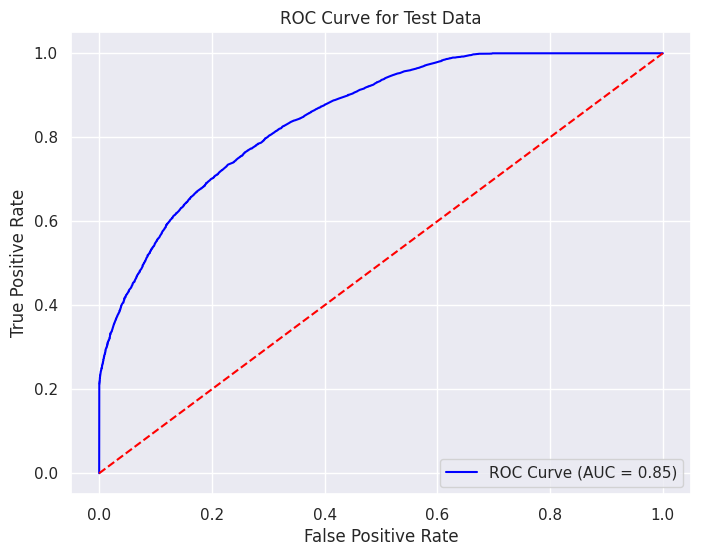

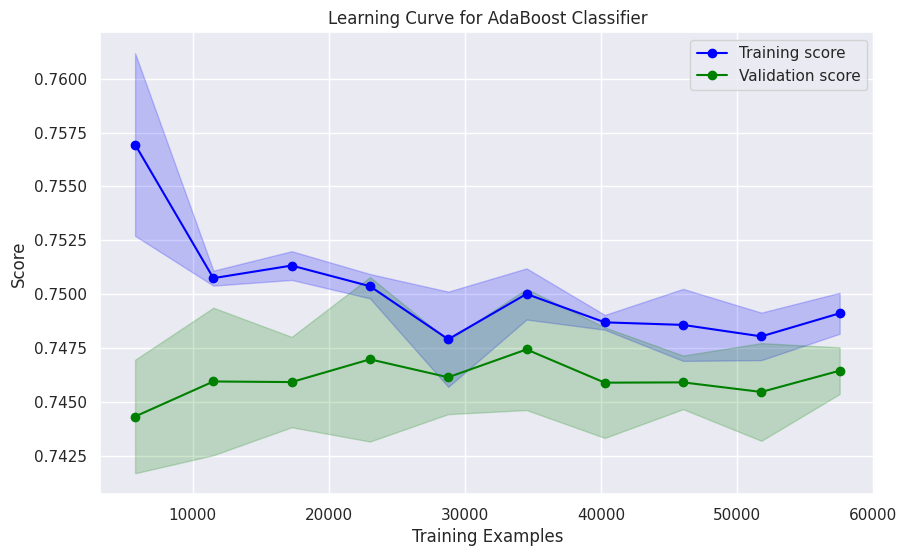

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import ( recall_score, precision_score, f1_score, accuracy_score,confusion_matrix, log_loss, roc_curve, auc)
from sklearn.model_selection import learning_curve

# Initialize the AdaBoost Classifier
adaboost = AdaBoostClassifier(
    n_estimators=100,  # Number of boosting rounds
    learning_rate=1.0,  # Learning rate
    random_state=42
)

# Fit the model
adaboost.fit(X_train, y_train)

# Predictions
y_train_pred = adaboost.predict(X_train)
y_test_pred = adaboost.predict(X_test)

# Probability predictions for log-loss and ROC curve
y_train_prob = adaboost.predict_proba(X_train)
y_test_prob = adaboost.predict_proba(X_test)

# Scores
print('Recall Score for training data is', recall_score(y_train, y_train_pred))
print('Precision Score for training data is', precision_score(y_train, y_train_pred))
print('F1 Score for training data is', f1_score(y_train, y_train_pred))
print('Accuracy Score for training data is', accuracy_score(y_train, y_train_pred))
print('\n')
print('Recall Score for testing data is', recall_score(y_test, y_test_pred))
print('Precision Score for testing data is', precision_score(y_test, y_test_pred))
print('F1 Score for testing data is', f1_score(y_test, y_test_pred))
print('Accuracy Score for testing data is', accuracy_score(y_test, y_test_pred))
print('\n\n')

# Confusion Matrix
print('Confusion Matrix for training data is:')
print(confusion_matrix(y_train, y_train_pred))
print('\n')
print('Confusion Matrix for testing data is:')
print(confusion_matrix(y_test, y_test_pred))
print('\n\n')

# Log-loss
train_log_loss = log_loss(y_train, y_train_prob)
test_log_loss = log_loss(y_test, y_test_prob)
print(f'Log Loss for training data: {train_log_loss:.4f}')
print(f'Log Loss for testing data: {test_log_loss:.4f}')
print('\n\n')

# Log-Loss Curve
def plot_log_loss_curve(estimator, X, y, title="Log-Loss Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='neg_log_loss', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training log-loss')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation log-loss')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Log Loss')
    plt.legend(loc='best')
    plt.show()

plot_log_loss_curve(adaboost, X_train, y_train, title="Log-Loss Curve for AdaBoost Classifier")
print('\n\n')

# ROC Curve
def plot_roc_curve(y_true, y_prob, title="ROC Curve"):
    fpr, tpr, _ = roc_curve(y_true, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(y_test, y_test_prob, title="ROC Curve for Test Data")
print('\n\n')

# Train-Test Learning Curve
def plot_learning_curve(estimator, X, y, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.show()

plot_learning_curve(adaboost, X_train, y_train, title="Learning Curve for AdaBoost Classifier")


# **Gradiant Boost**



Recall Score for training data is 0.6553794829024187
Precision Score for training data is 0.806527763522529
F1 Score for training data is 0.7231399254589794
Accuracy Score for training data is 0.7490825688073395


Recall Score for testing data is 0.6502335236118318
Precision Score for testing data is 0.8102166181700614
F1 Score for testing data is 0.7214625017993378
Accuracy Score for testing data is 0.7489621172807472



Confusion Matrix for training data is:
[[30315  5655]
 [12396 23574]]


Confusion Matrix for testing data is:
[[13068  2348]
 [ 5392 10024]]



Log Loss for training data: 0.4930
Log Loss for testing data: 0.4952





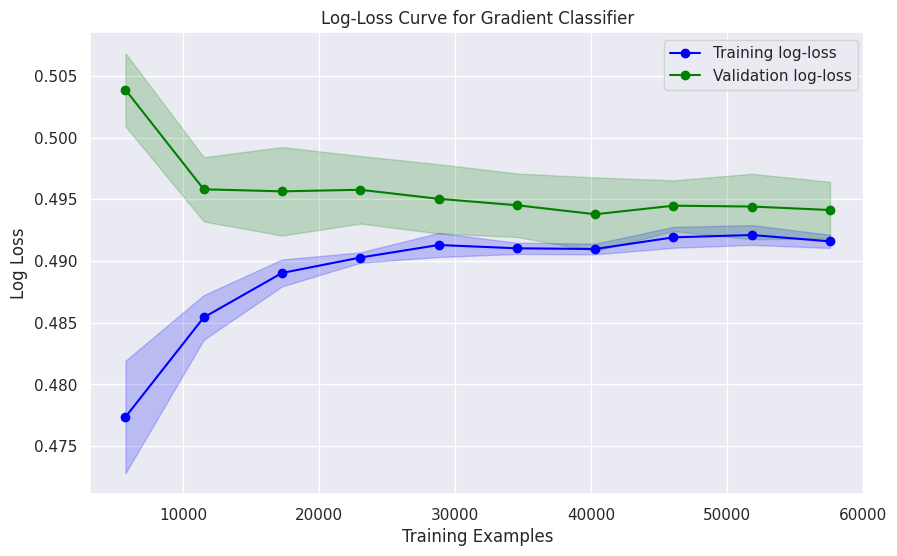

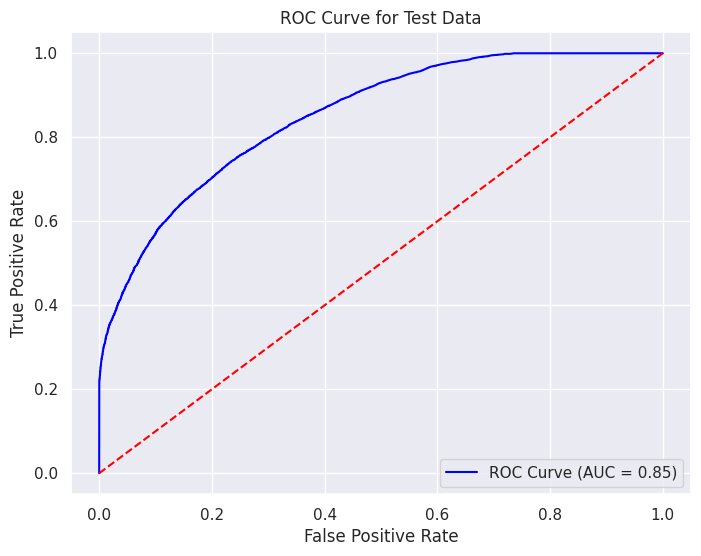

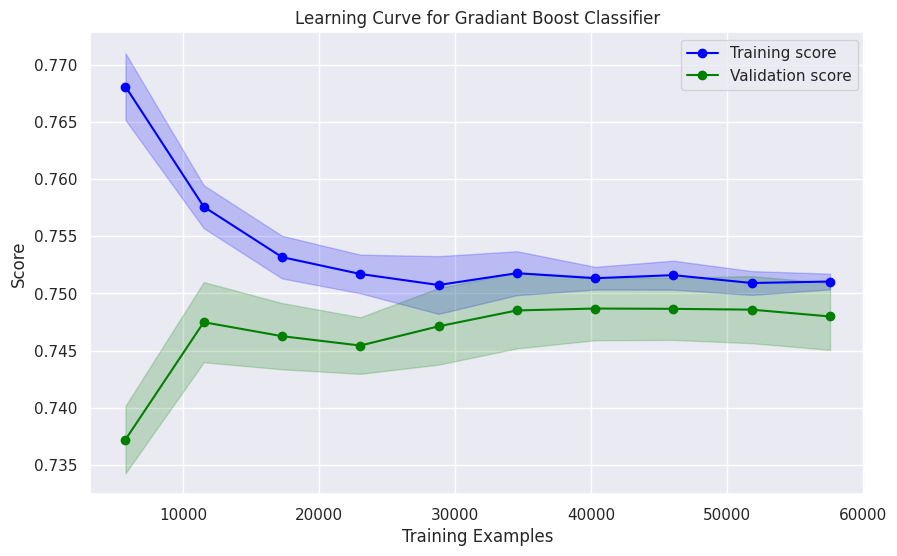

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, log_loss, roc_curve, auc) # Added log_loss here
from sklearn.model_selection import learning_curve

gbm = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Fit the model
gbm.fit(X_train, y_train)

# Predictions
y_train_pred = gbm.predict(X_train)
y_test_pred = gbm.predict(X_test)

# Probability predictions for log-loss and ROC curve
y_train_prob = gbm.predict_proba(X_train)
y_test_prob = gbm.predict_proba(X_test)

# Scores
print('\n\nRecall Score for training data is', recall_score(y_train, y_train_pred))
print('Precision Score for training data is', precision_score(y_train, y_train_pred))
print('F1 Score for training data is', f1_score(y_train, y_train_pred))
print('Accuracy Score for training data is', accuracy_score(y_train, y_train_pred))
print('\n')
print('Recall Score for testing data is', recall_score(y_test, y_test_pred))
print('Precision Score for testing data is', precision_score(y_test, y_test_pred))
print('F1 Score for testing data is', f1_score(y_test, y_test_pred))
print('Accuracy Score for testing data is', accuracy_score(y_test, y_test_pred))
print('\n\n')

# Confusion Matrix
print('Confusion Matrix for training data is:')
print(confusion_matrix(y_train, y_train_pred))
print('\n')
print('Confusion Matrix for testing data is:')
print(confusion_matrix(y_test, y_test_pred))
print('\n\n')

# Log-loss
train_log_loss = log_loss(y_train, y_train_prob)
test_log_loss = log_loss(y_test, y_test_prob)
print(f'Log Loss for training data: {train_log_loss:.4f}')
print(f'Log Loss for testing data: {test_log_loss:.4f}')
print('\n\n')

# Log-Loss Curve
def plot_log_loss_curve(estimator, X, y, title="Log-Loss Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='neg_log_loss', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training log-loss')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation log-loss')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Log Loss')
    plt.legend(loc='best')
    plt.show()

plot_log_loss_curve(gbm, X_train, y_train, title="Log-Loss Curve for Gradient Classifier")
print('\n\n')

# ROC Curve
def plot_roc_curve(y_true, y_prob, title="ROC Curve"):
    fpr, tpr, _ = roc_curve(y_true, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(y_test, y_test_prob, title="ROC Curve for Test Data")
print('\n\n')

# Train-Test Learning Curve
def plot_learning_curve(estimator, X, y, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.show()

plot_learning_curve(gbm, X_train, y_train, title="Learning Curve for Gradiant Boost Classifier")


# **Naive Bayes**


1.  Gaussian NB
2.  Multinominal NB
3.  Bernulli NB



**Gaussian Naive Bayes**

Recall Score for training data is 0.6512649430080623
Precision Score for training data is 0.6540287006533028
F1 Score for training data is 0.6526438959157519
Accuracy Score for training data is 0.6533778148457048


Recall Score for testing data is 0.6488713025428127
Precision Score for testing data is 0.6547751521895661
F1 Score for testing data is 0.6518098589254879
Accuracy Score for testing data is 0.6533796056045666



Confusion Matrix for training data is:
[[23578 12392]
 [12544 23426]]


Confusion Matrix for testing data is:
[[10142  5274]
 [ 5413 10003]]



Log Loss for training data: 1.0194
Log Loss for testing data: 1.0529





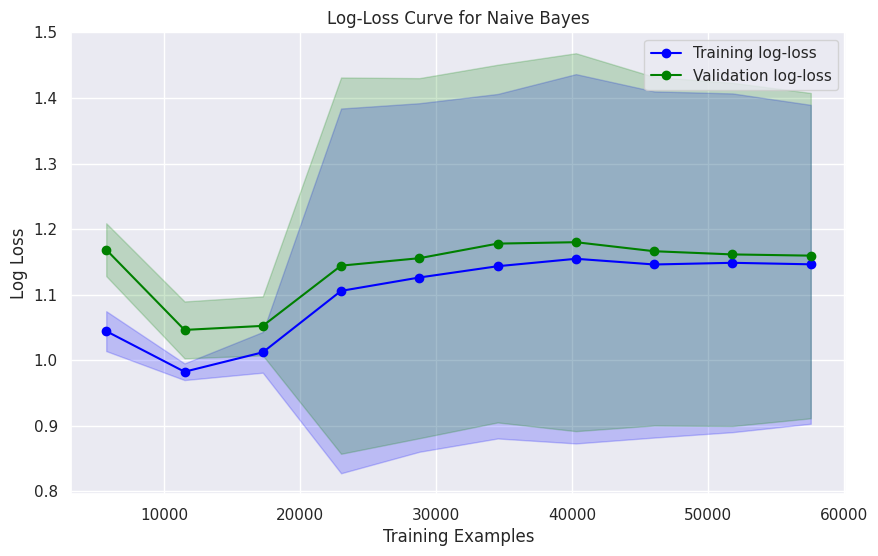

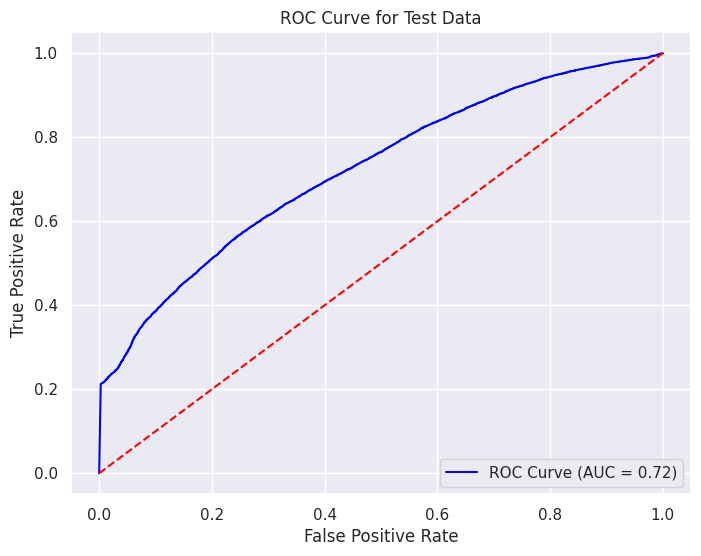

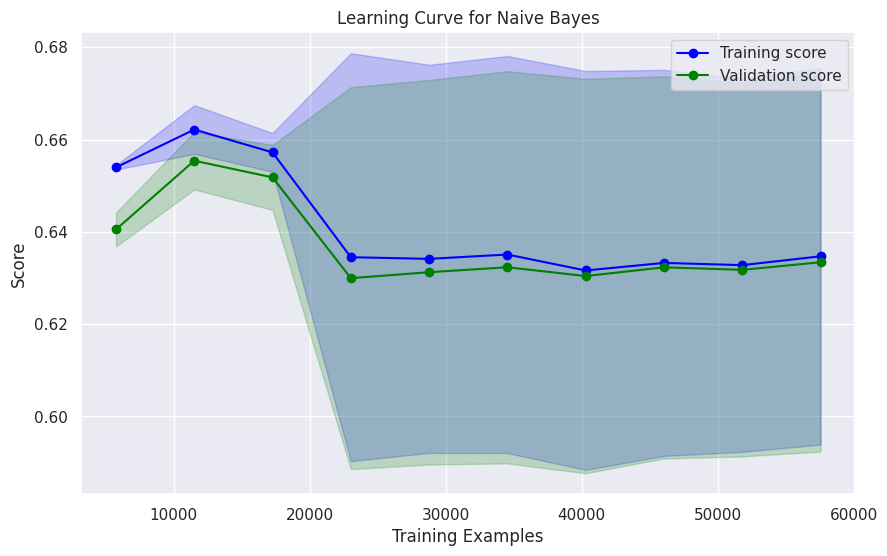

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, log_loss, roc_curve, auc)
from sklearn.model_selection import learning_curve

# Initialize the Naive Bayes model (GaussianNB for continuous features)
nb = GaussianNB()

# Fit the model
nb.fit(X_train, y_train)

# Predictions
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)

# Probability predictions for log-loss and ROC curve
y_train_prob = nb.predict_proba(X_train)
y_test_prob = nb.predict_proba(X_test)

# Scores
print('Recall Score for training data is', recall_score(y_train, y_train_pred))
print('Precision Score for training data is', precision_score(y_train, y_train_pred))
print('F1 Score for training data is', f1_score(y_train, y_train_pred))
print('Accuracy Score for training data is', accuracy_score(y_train, y_train_pred))
print('\n')
print('Recall Score for testing data is', recall_score(y_test, y_test_pred))
print('Precision Score for testing data is', precision_score(y_test, y_test_pred))
print('F1 Score for testing data is', f1_score(y_test, y_test_pred))
print('Accuracy Score for testing data is', accuracy_score(y_test, y_test_pred))
print('\n\n')

# Confusion Matrix
print('Confusion Matrix for training data is:')
print(confusion_matrix(y_train, y_train_pred))
print('\n')
print('Confusion Matrix for testing data is:')
print(confusion_matrix(y_test, y_test_pred))
print('\n\n')

# Log-loss
train_log_loss = log_loss(y_train, y_train_prob)
test_log_loss = log_loss(y_test, y_test_prob)
print(f'Log Loss for training data: {train_log_loss:.4f}')
print(f'Log Loss for testing data: {test_log_loss:.4f}')
print('\n\n')

# Log-Loss Curve
def plot_log_loss_curve(estimator, X, y, title="Log-Loss Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='neg_log_loss', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training log-loss')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation log-loss')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Log Loss')
    plt.legend(loc='best')
    plt.show()

plot_log_loss_curve(nb, X_train, y_train, title="Log-Loss Curve for Naive Bayes")
print('\n\n')

# ROC Curve
def plot_roc_curve(y_true, y_prob, title="ROC Curve"):
    fpr, tpr, _ = roc_curve(y_true, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(y_test, y_test_prob, title="ROC Curve for Test Data")
print('\n\n')

# Train-Test Learning Curve
def plot_learning_curve(estimator, X, y, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.show()

plot_learning_curve(nb, X_train, y_train, title="Learning Curve for Naive Bayes")


**Multinominal Naive Bayes**

Recall Score for training data is 0.6023352793994996
Precision Score for training data is 0.6502205816151976
F1 Score for training data is 0.6253626012036195
Accuracy Score for training data is 0.6391576313594662


Recall Score for testing data is 0.601063829787234
Precision Score for testing data is 0.6534555712270804
F1 Score for testing data is 0.6261656980673064
Accuracy Score for testing data is 0.6411520498183705



Confusion Matrix for training data is:
[[24315 11655]
 [14304 21666]]


Confusion Matrix for testing data is:
[[10502  4914]
 [ 6150  9266]]



Log Loss for training data: 0.6444
Log Loss for testing data: 0.6468





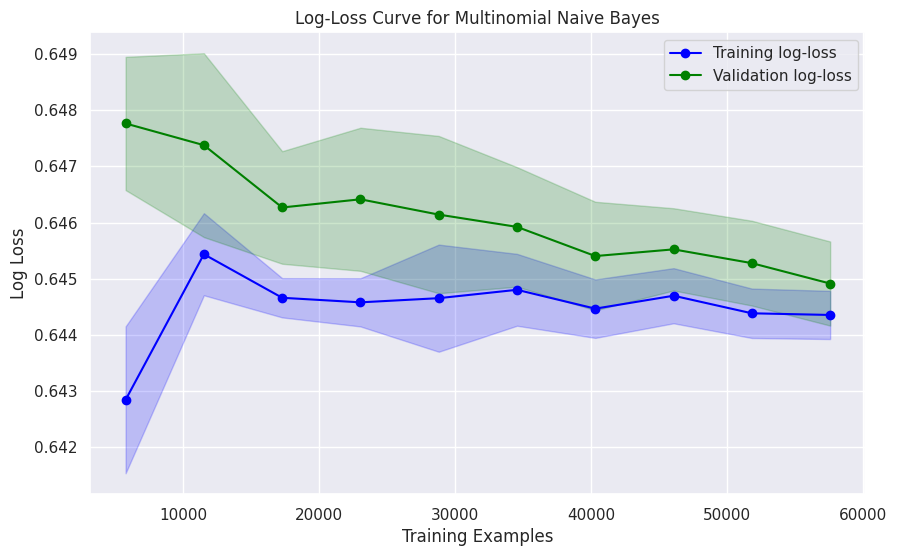

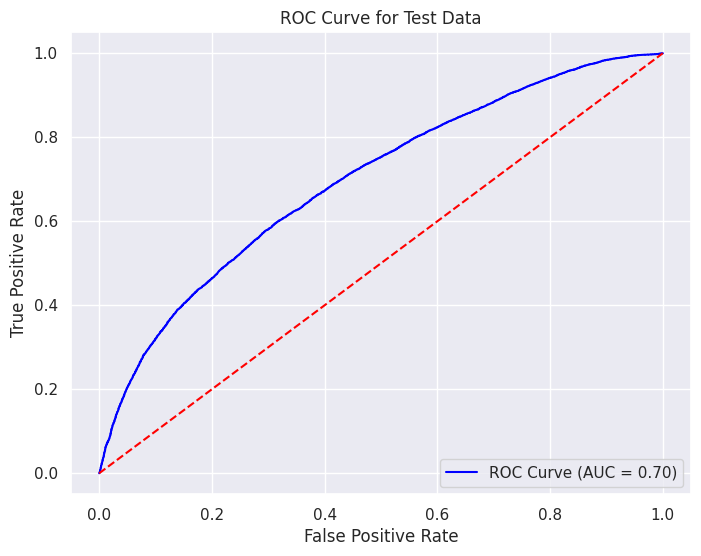

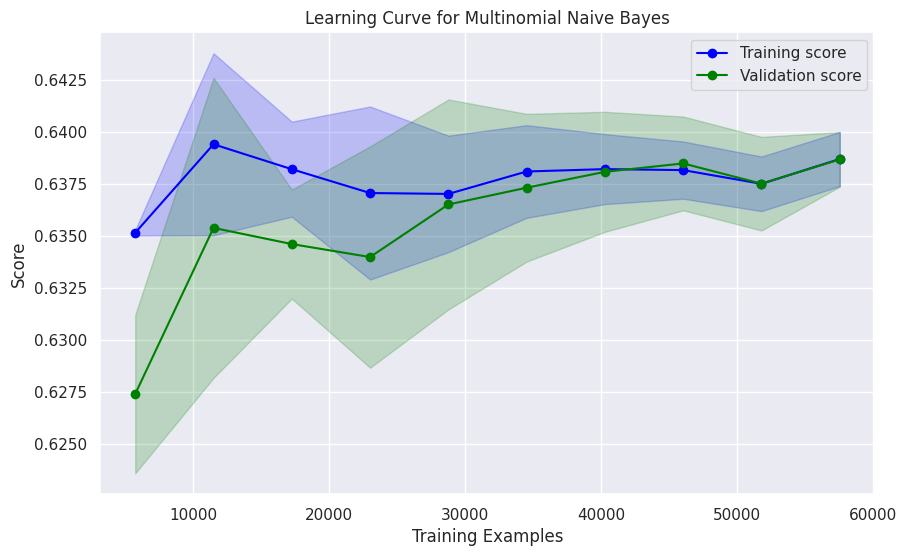

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, log_loss, roc_curve, auc)
from sklearn.model_selection import learning_curve

# Initialize the Multinomial Naive Bayes model
mnb = MultinomialNB()

# Fit the model
mnb.fit(X_train, y_train)

# Predictions
y_train_pred = mnb.predict(X_train)
y_test_pred = mnb.predict(X_test)

# Probability predictions for log-loss and ROC curve
y_train_prob = mnb.predict_proba(X_train)
y_test_prob = mnb.predict_proba(X_test)

# Scores
print('Recall Score for training data is', recall_score(y_train, y_train_pred))
print('Precision Score for training data is', precision_score(y_train, y_train_pred))
print('F1 Score for training data is', f1_score(y_train, y_train_pred))
print('Accuracy Score for training data is', accuracy_score(y_train, y_train_pred))
print('\n')
print('Recall Score for testing data is', recall_score(y_test, y_test_pred))
print('Precision Score for testing data is', precision_score(y_test, y_test_pred))
print('F1 Score for testing data is', f1_score(y_test, y_test_pred))
print('Accuracy Score for testing data is', accuracy_score(y_test, y_test_pred))
print('\n\n')

# Confusion Matrix
print('Confusion Matrix for training data is:')
print(confusion_matrix(y_train, y_train_pred))
print('\n')
print('Confusion Matrix for testing data is:')
print(confusion_matrix(y_test, y_test_pred))
print('\n\n')

# Log-loss
train_log_loss = log_loss(y_train, y_train_prob)
test_log_loss = log_loss(y_test, y_test_prob)
print(f'Log Loss for training data: {train_log_loss:.4f}')
print(f'Log Loss for testing data: {test_log_loss:.4f}')
print('\n\n')

# Log-Loss Curve
def plot_log_loss_curve(estimator, X, y, title="Log-Loss Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='neg_log_loss', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training log-loss')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation log-loss')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Log Loss')
    plt.legend(loc='best')
    plt.show()

plot_log_loss_curve(mnb, X_train, y_train, title="Log-Loss Curve for Multinomial Naive Bayes")
print('\n\n')

# ROC Curve
def plot_roc_curve(y_true, y_prob, title="ROC Curve"):
    fpr, tpr, _ = roc_curve(y_true, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(y_test, y_test_prob, title="ROC Curve for Test Data")
print('\n\n')

# Train-Test Learning Curve
def plot_learning_curve(estimator, X, y, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.show()

plot_learning_curve(mnb, X_train, y_train, title="Learning Curve for Multinomial Naive Bayes")


**Bernulli Naive Bayes**

Recall Score for training data is 0.5845704753961635
Precision Score for training data is 0.6359869336398282
F1 Score for training data is 0.60919573531116
Accuracy Score for training data is 0.624993049763692


Recall Score for testing data is 0.5771925272444214
Precision Score for testing data is 0.6331293581898392
F1 Score for testing data is 0.6038683406854428
Accuracy Score for testing data is 0.6213674104826155



Confusion Matrix for training data is:
[[23935 12035]
 [14943 21027]]


Confusion Matrix for testing data is:
[[10260  5156]
 [ 6518  8898]]



Log Loss for training data: 0.6490
Log Loss for testing data: 0.6508





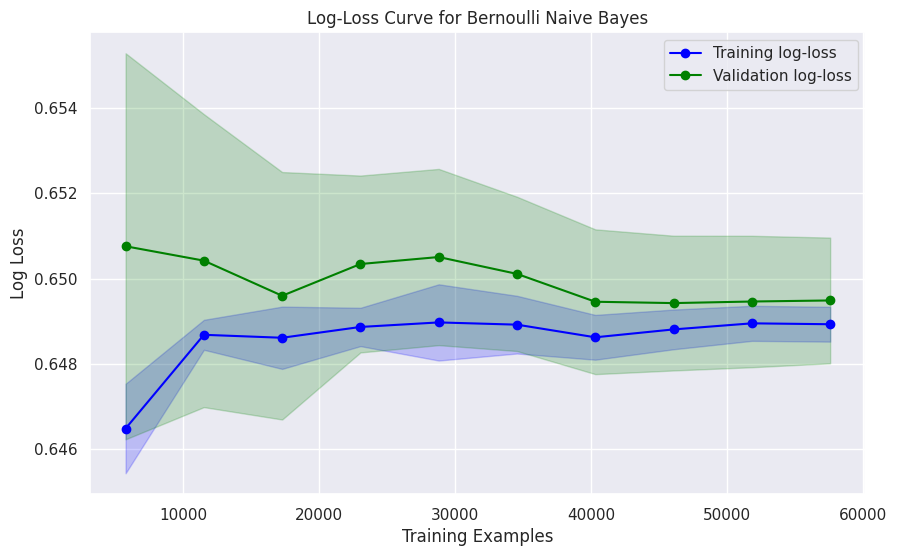

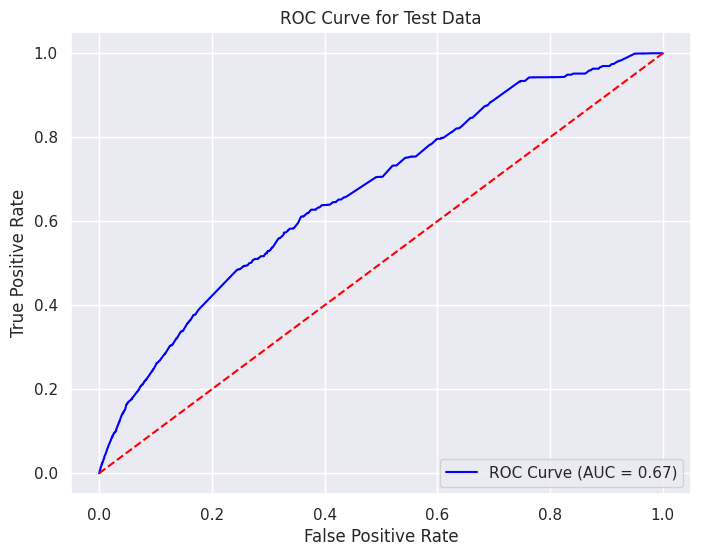

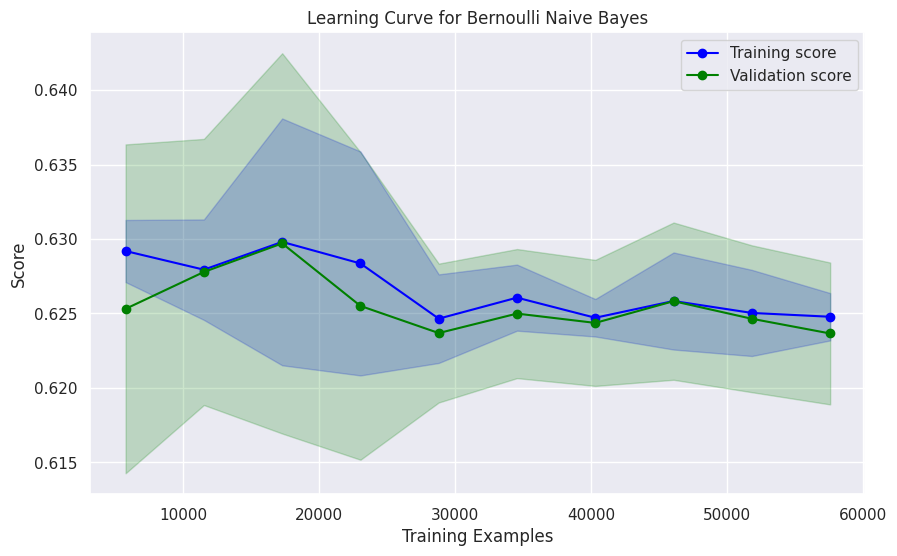

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import (recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, log_loss, roc_curve, auc)
from sklearn.model_selection import learning_curve

# Initialize the Bernoulli Naive Bayes model
bnb = BernoulliNB()

# Fit the model
bnb.fit(X_train, y_train)

# Predictions
y_train_pred = bnb.predict(X_train)
y_test_pred = bnb.predict(X_test)

# Probability predictions for log-loss and ROC curve
y_train_prob = bnb.predict_proba(X_train)
y_test_prob = bnb.predict_proba(X_test)

# Scores
print('Recall Score for training data is', recall_score(y_train, y_train_pred))
print('Precision Score for training data is', precision_score(y_train, y_train_pred))
print('F1 Score for training data is', f1_score(y_train, y_train_pred))
print('Accuracy Score for training data is', accuracy_score(y_train, y_train_pred))
print('\n')
print('Recall Score for testing data is', recall_score(y_test, y_test_pred))
print('Precision Score for testing data is', precision_score(y_test, y_test_pred))
print('F1 Score for testing data is', f1_score(y_test, y_test_pred))
print('Accuracy Score for testing data is', accuracy_score(y_test, y_test_pred))
print('\n\n')

# Confusion Matrix
print('Confusion Matrix for training data is:')
print(confusion_matrix(y_train, y_train_pred))
print('\n')
print('Confusion Matrix for testing data is:')
print(confusion_matrix(y_test, y_test_pred))
print('\n\n')

# Log-loss
train_log_loss = log_loss(y_train, y_train_prob)
test_log_loss = log_loss(y_test, y_test_prob)
print(f'Log Loss for training data: {train_log_loss:.4f}')
print(f'Log Loss for testing data: {test_log_loss:.4f}')
print('\n\n')

# Log-Loss Curve
def plot_log_loss_curve(estimator, X, y, title="Log-Loss Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='neg_log_loss', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training log-loss')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation log-loss')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Log Loss')
    plt.legend(loc='best')
    plt.show()

plot_log_loss_curve(bnb, X_train, y_train, title="Log-Loss Curve for Bernoulli Naive Bayes")
print('\n\n')

# ROC Curve
def plot_roc_curve(y_true, y_prob, title="ROC Curve"):
    fpr, tpr, _ = roc_curve(y_true, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(y_test, y_test_prob, title="ROC Curve for Test Data")
print('\n\n')

# Train-Test Learning Curve
def plot_learning_curve(estimator, X, y, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.show()

plot_learning_curve(bnb, X_train, y_train, title="Learning Curve for Bernoulli Naive Bayes")

# **Applying 5 Fold Cross Validation with Grid Search and Random Search on Random Forest**

Before Accuracy = 83.53%
*   After Grid Search Accuracy = 85.3%
*   After Random Search Accuracy = 84.9%


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# GridSearchCV setup with 5-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, verbose=2, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV with 5-fold cross-validation
grid_search_rf.fit(X_train, y_train)

# Best parameters and best accuracy
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best accuracy score for Random Forest:", grid_search_rf.best_score_)

# Use the best estimator found by Grid Search
best_rf_model = grid_search_rf.best_estimator_

# Evaluate on test set
y_pred_rf = best_rf_model.predict(X_test)
print("Accuracy of best Random Forest model on test data:", accuracy_score(y_test, y_pred_rf))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Define the parameter distribution for Random Forest
param_dist_rf = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV setup with 5-fold cross-validation
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1, scoring='accuracy')

# Fit RandomizedSearchCV with 5-fold cross-validation
random_search_rf.fit(X_train, y_train)

# Best parameters and best accuracy
print("Best parameters for Random Forest:", random_search_rf.best_params_)
print("Best accuracy score for Random Forest:", random_search_rf.best_score_)

# Use the best estimator found by Random Search
best_rf_model_random = random_search_rf.best_estimator_

# Evaluate on test set
y_pred_rf_random = best_rf_model_random.predict(X_test)
print("Accuracy of best Random Forest model (Random Search) on test data:", accuracy_score(y_test, y_pred_rf_random))


# **Applying Grid Search and Random Search on LightBoosting**

Before Accuracy = 83.45%
*   After Grid Search Accuracy = 85.2%
*   After Random Search Accuracy = 84.9%



In [ ]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

# Define the parameter grid for LightGBM
param_grid_lgb = {
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 5, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Initialize the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# GridSearchCV setup with 5-fold cross-validation
grid_search_lgb = GridSearchCV(estimator=lgb_model, param_grid=param_grid_lgb, cv=5, verbose=2, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV with 5-fold cross-validation
grid_search_lgb.fit(X_train, y_train)

# Best parameters and best accuracy
print("Best parameters for LightGBM:", grid_search_lgb.best_params_)
print("Best accuracy score for LightGBM:", grid_search_lgb.best_score_)

# Use the best estimator found by Grid Search
best_lgb_model = grid_search_lgb.best_estimator_

# Evaluate on test set
y_pred_lgb = best_lgb_model.predict(X_test)
print("Accuracy of best LightGBM model on test data:", accuracy_score(y_test, y_pred_lgb))


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
from scipy.stats import randint, uniform

# Define the parameter distribution for LightGBM
param_dist_lgb = {
    'num_leaves': randint(20, 100),
    'max_depth': [-1, 5, 10, 20],
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': randint(100, 500)
}

# Initialize the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# RandomizedSearchCV setup with 5-fold cross-validation
random_search_lgb = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_dist_lgb, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1, scoring='accuracy')

# Fit RandomizedSearchCV with 5-fold cross-validation
random_search_lgb.fit(X_train, y_train)

# Best parameters and best accuracy
print("Best parameters for LightGBM (Random Search):", random_search_lgb.best_params_)
print("Best accuracy score for LightGBM (Random Search):", random_search_lgb.best_score_)

# Use the best estimator found by Random Search
best_lgb_model_random = random_search_lgb.best_estimator_

# Evaluate on test set
y_pred_lgb_random = best_lgb_model_random.predict(X_test)
print("Accuracy of best LightGBM model (Random Search) on test data:", accuracy_score(y_test, y_pred_lgb_random))


# Ensemble

# Bagging method

In [51]:
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, log_loss, confusion_matrix

# Assuming X_train, X_test, y_train, y_test are pre-defined

# Hyperparameter-tuned models
rf = RandomForestClassifier(n_estimators=500, max_depth=50, min_samples_split=5, random_state=42)
xgb = XGBClassifier(n_estimators=500, max_depth=8, learning_rate=0.05,subsample=0.8,
    colsample_bytree=0.8,reg_alpha=1, reg_lambda=1, random_state=42)  # Changed parameters
lgb = LGBMClassifier( n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,
    num_leaves=31,
    random_state=42)

# Bagging with each classifier
classifiers = {'Random Forest': rf, 'XGBoost': xgb, 'LightGBM': lgb}

for name, clf in classifiers.items():
    # Use 'estimator' instead of 'base_estimator'
    bagging = BaggingClassifier(estimator=clf, n_estimators=10, random_state=42)
    bagging.fit(X_train, y_train)

    # Predictions and probabilities
    y_train_pred = bagging.predict(X_train)
    y_train_proba = bagging.predict_proba(X_train)[:, 1]
    y_test_pred = bagging.predict(X_test)
    y_test_proba = bagging.predict_proba(X_test)[:, 1]

    # Metrics for training data
    train_recall = recall_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_logloss = log_loss(y_train, y_train_proba)
    train_cm = confusion_matrix(y_train, y_train_pred)

    # Metrics for testing data
    test_recall = recall_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_logloss = log_loss(y_test, y_test_proba)
    test_cm = confusion_matrix(y_test, y_test_pred)

    # Print metrics
    print(f"\n{name} with Bagging:")
    print(f"Recall Score for training data: {train_recall:.4f}")
    print(f"Precision Score for training data: {train_precision:.4f}")
    print(f"F1 Score for training data: {train_f1:.4f}")
    print(f"Accuracy Score for training data: {train_accuracy:.4f}")
    print(f"Log Loss for training data: {train_logloss:.4f}")
    print("Confusion Matrix for training data:")
    print(train_cm)

    print(f"\nRecall Score for testing data: {test_recall:.4f}")
    print(f"Precision Score for testing data: {test_precision:.4f}")
    print(f"F1 Score for testing data: {test_f1:.4f}")
    print(f"Accuracy Score for testing data: {test_accuracy:.4f}")
    print(f"Log Loss for testing data: {test_logloss:.4f}")
    print("Confusion Matrix for testing data:")
    print(test_cm)

# Add any further analysis or modifications as needed.



Random Forest with Bagging:
Recall Score for training data: 0.9732
Precision Score for training data: 0.9805
F1 Score for training data: 0.9769
Accuracy Score for training data: 0.9769
Log Loss for training data: 0.2703
Confusion Matrix for training data:
[[35274   696]
 [  963 35007]]

Recall Score for testing data: 0.7685
Precision Score for testing data: 0.8505
F1 Score for testing data: 0.8074
Accuracy Score for testing data: 0.8167
Log Loss for testing data: 0.4348
Confusion Matrix for testing data:
[[13333  2083]
 [ 3569 11847]]

XGBoost with Bagging:
Recall Score for training data: 0.8941
Precision Score for training data: 0.8851
F1 Score for training data: 0.8896
Accuracy Score for training data: 0.8890
Log Loss for training data: 0.3023
Confusion Matrix for training data:
[[31796  4174]
 [ 3809 32161]]

Recall Score for testing data: 0.8288
Precision Score for testing data: 0.8305
F1 Score for testing data: 0.8296
Accuracy Score for testing data: 0.8298
Log Loss for testing d

# Voting

In [52]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, log_loss, confusion_matrix

# Assuming X_train, X_test, y_train, y_test are pre-defined

# Hyperparameter-tuned models with adjusted parameters to reduce overfitting
rf = RandomForestClassifier(n_estimators=500, max_depth=50, min_samples_split=5, random_state=42)
xgb = XGBClassifier(n_estimators=500, max_depth=8, learning_rate=0.05,subsample=0.8,
    colsample_bytree=0.8,reg_alpha=1, reg_lambda=1, random_state=42)  # Changed parameters
lgb = LGBMClassifier( n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,
    num_leaves=31,
    random_state=42)

# Create a VotingClassifier with the base classifiers
voting_clf = VotingClassifier(
    estimators=[('Random Forest', rf), ('XGBoost', xgb), ('LightGBM', lgb)], voting='soft'
)

# Fit the voting classifier
voting_clf.fit(X_train, y_train)

# Predictions and probabilities
y_train_pred = voting_clf.predict(X_train)
y_train_proba = voting_clf.predict_proba(X_train)[:, 1]
y_test_pred = voting_clf.predict(X_test)
y_test_proba = voting_clf.predict_proba(X_test)[:, 1]

# Metrics for training data
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_logloss = log_loss(y_train, y_train_proba)
train_cm = confusion_matrix(y_train, y_train_pred)

# Metrics for testing data
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_logloss = log_loss(y_test, y_test_proba)
test_cm = confusion_matrix(y_test, y_test_pred)

# Print metrics
print(f"\nVoting Classifier:")
print(f"Recall Score for training data: {train_recall:.4f}")
print(f"Precision Score for training data: {train_precision:.4f}")
print(f"F1 Score for training data: {train_f1:.4f}")
print(f"Accuracy Score for training data: {train_accuracy:.4f}")
print(f"Log Loss for training data: {train_logloss:.4f}")
print("Confusion Matrix for training data:")
print(train_cm)

print(f"\nRecall Score for testing data: {test_recall:.4f}")
print(f"Precision Score for testing data: {test_precision:.4f}")
print(f"F1 Score for testing data: {test_f1:.4f}")
print(f"Accuracy Score for testing data: {test_accuracy:.4f}")
print(f"Log Loss for testing data: {test_logloss:.4f}")
print("Confusion Matrix for testing data:")
print(test_cm)

# Add any further analysis or modifications as needed.


[LightGBM] [Info] Number of positive: 35970, number of negative: 35970
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2407
[LightGBM] [Info] Number of data points in the train set: 71940, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Voting Classifier:
Recall Score for training data: 0.9552
Precision Score for training data: 0.9293
F1 Score for training data: 0.9421
Accuracy Score for training data: 0.9413
Log Loss for training data: 0.2721
Confusion Matrix for training data:
[[33357  2613]
 [ 1612 34358]]

Recall Score for testing data: 0.8295
Precision Score for testing data: 0.8477
F1 Score for testing data: 0.8385
Accuracy Score for testing data: 0.8402
Log Loss for testing data: 0.3781
Confusion Matrix for testing d

# **Tuning with Random Search**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, recall_score, precision_score, log_loss

# Define base classifiers
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
lgb = LGBMClassifier(random_state=42, verbose=-1, force_row_wise=True)  # Suppress warnings, optimize threading

# Voting Classifier
voting_clf = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb), ('lgb', lgb)], voting='soft')

# Simplified Hyperparameter grid (removing redundant parameters)
param_grid = {
    'rf__n_estimators': [100, 500, 1000],
    'rf__max_depth': [10, 30, 50, None],
    'rf__min_samples_split': [2, 5, 10],
    'xgb__n_estimators': [100, 500, 1000],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__max_depth': [3, 6, 10],
    'xgb__subsample': [0.6, 0.8, 1.0],  # Retain this
    'xgb__colsample_bytree': [0.6, 0.8, 1.0],  # Retain this
    'lgb__n_estimators': [100, 500, 1000],
    'lgb__learning_rate': [0.01, 0.1, 0.2],
    'lgb__max_depth': [10, 30, 50, -1],  # -1 for no limit
    'lgb__num_leaves': [15, 31, 63],
    'lgb__feature_fraction': [0.6, 0.8, 1.0],  # Use this (removed colsample_bytree for redundancy)
    'lgb__bagging_fraction': [0.6, 0.8, 1.0],  # Use this (removed subsample for redundancy)
}

# Define a scoring metric
scoring = make_scorer(f1_score, average='binary')

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=voting_clf,
    param_distributions=param_grid,
    n_iter=20,  # Number of random combinations to try
    scoring=scoring,
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Perform the search
random_search.fit(X_train, y_train)

# Best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print(f"Best Parameters: {best_params}")
print("\nBest Voting Classifier:\n", best_model)

# Evaluate on the test set
y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]

# Metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_logloss = log_loss(y_test, y_test_proba)

print(f"\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Log Loss: {test_logloss:.4f}")


Best Voting Classifier:
 VotingClassifier(estimators=[('rf',
                             
                              RandomForestClassifier(max_depth=50,
                                                     min_samples_split=10,
                                                     n_estimators=500,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_typ...
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('lgb',
                              LGBMClassifier(bagging_fraction=0.8,
                                             feature_fraction=0.8,
                                             force_row_wise=True,
                                             learning_rate=0.2,
                                             n_estimators=1000, num_leaves=63,
                                             random_state=42, verbose=-1))],
                 voting='soft')

Test Set Metrics:
Accuracy: 0.8607
F1 Score: 0.8622
Recall: 0.8713
Precision: 0.8532
Log Loss: 0.3994

# **Tuning the voting**

In [53]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, log_loss, confusion_matrix

# Assuming X_train, X_test, y_train, y_test are pre-defined

# Hyperparameter-tuned models with adjusted parameters to reduce overfitting
rf = RandomForestClassifier(max_depth=50,
                                                     min_samples_split=10,
                                                     n_estimators=500,
                                                     random_state=42)
xgb = XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            max_delta_step=None, max_depth=6,
                                            n_estimators=500, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42)
lgb = LGBMClassifier(bagging_fraction=0.8,
                                             feature_fraction=0.8,
                                             force_row_wise=True,
                                             learning_rate=0.1,
                                             n_estimators=1000, num_leaves=63,
                                             random_state=42, verbose=-1)

# Create a VotingClassifier with the base classifiers
voting_clf = VotingClassifier(
    estimators=[('Random Forest', rf), ('XGBoost', xgb), ('LightGBM', lgb)], voting='soft'
)

# Fit the voting classifier
voting_clf.fit(X_train, y_train)

# Predictions and probabilities
y_train_pred = voting_clf.predict(X_train)
y_train_proba = voting_clf.predict_proba(X_train)[:, 1]
y_test_pred = voting_clf.predict(X_test)
y_test_proba = voting_clf.predict_proba(X_test)[:, 1]

# Metrics for training data
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_logloss = log_loss(y_train, y_train_proba)
train_cm = confusion_matrix(y_train, y_train_pred)

# Metrics for testing data
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_logloss = log_loss(y_test, y_test_proba)
test_cm = confusion_matrix(y_test, y_test_pred)

# Print metrics
print(f"\nVoting Classifier:")
print(f"Recall Score for training data: {train_recall:.4f}")
print(f"Precision Score for training data: {train_precision:.4f}")
print(f"F1 Score for training data: {train_f1:.4f}")
print(f"Accuracy Score for training data: {train_accuracy:.4f}")
print(f"Log Loss for training data: {train_logloss:.4f}")
print("Confusion Matrix for training data:")
print(train_cm)

print(f"\nRecall Score for testing data: {test_recall:.4f}")
print(f"Precision Score for testing data: {test_precision:.4f}")
print(f"F1 Score for testing data: {test_f1:.4f}")
print(f"Accuracy Score for testing data: {test_accuracy:.4f}")
print(f"Log Loss for testing data: {test_logloss:.4f}")
print("Confusion Matrix for testing data:")
print(test_cm)

# Add any further analysis or modifications as needed.



Voting Classifier:
Recall Score for training data: 0.9937
Precision Score for training data: 0.9844
F1 Score for training data: 0.9891
Accuracy Score for training data: 0.9890
Log Loss for training data: 0.1714
Confusion Matrix for training data:
[[35405   565]
 [  225 35745]]

Recall Score for testing data: 0.8866
Precision Score for testing data: 0.8487
F1 Score for testing data: 0.8672
Accuracy Score for testing data: 0.8643
Log Loss for testing data: 0.3336
Confusion Matrix for testing data:
[[12979  2437]
 [ 1748 13668]]


# **Cross Validation and Fine Tuning**

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, classification_report
import numpy as np

# Cross-validation for evaluating generalization performance
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(voting_clf, X_train, y_train, cv=cv, scoring='accuracy')

print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")

# Fit the voting classifier
voting_clf.fit(X_train, y_train)

# Predictions and probabilities
y_train_pred = voting_clf.predict(X_train)
y_train_proba = voting_clf.predict_proba(X_train)[:, 1]
y_test_pred = voting_clf.predict(X_test)
y_test_proba = voting_clf.predict_proba(X_test)[:, 1]

# Optimize Decision Threshold
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Adjust predictions based on the optimal threshold
y_test_pred_adjusted = (y_test_proba >= optimal_threshold).astype(int)

# Recalculate metrics with adjusted threshold
test_recall_adj = recall_score(y_test, y_test_pred_adjusted)
test_precision_adj = precision_score(y_test, y_test_pred_adjusted)
test_f1_adj = f1_score(y_test, y_test_pred_adjusted)
test_accuracy_adj = accuracy_score(y_test, y_test_pred_adjusted)
test_cm_adj = confusion_matrix(y_test, y_test_pred_adjusted)

# Print metrics
print(f"\nOptimal Threshold: {optimal_threshold:.4f}")
print(f"Adjusted Recall Score for testing data: {test_recall_adj:.4f}")
print(f"Adjusted Precision Score for testing data: {test_precision_adj:.4f}")
print(f"Adjusted F1 Score for testing data: {test_f1_adj:.4f}")
print(f"Adjusted Accuracy Score for testing data: {test_accuracy_adj:.4f}")
print("Adjusted Confusion Matrix for testing data:")
print(test_cm_adj)

# Optional: Plot ROC Curve and Precision-Recall Curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_test_proba):.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_test_proba)
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()

plt.tight_layout()
plt.show()


Cross-Validation Accuracy Scores:
 [0.85508757 0.85696414 0.86196831 0.85981373 0.85731165]

Mean CV Accuracy: 0.8582

Optimal Threshold: 0.4299

Adjusted Recall Score for testing data: 0.9399

Adjusted Precision Score for testing data: 0.8273

Adjusted F1 Score for testing data: 0.8800

**Adjusted Accuracy Score for testing data: 0.8718**

Adjusted Confusion Matrix for testing data:

[ [12391  3025]

 [  927 14489] ]